# **INFO-6105 Final Project**
---
<img src='https://drive.google.com/uc?id=1egi6K7kVv8nkvT95k6W5gtPu-3OfV-il' width=800 height=500>
---

## NLP on '**A Brief History of Time** by **Stephen Hawking**' ⏲🌎

## **Introduction**

<img src='https://drive.google.com/uc?id=1IJBS786pkA3aHrT4nfBLaJFQ0sWOxxF9' width=500 height=500>

[**Stephen Hawking**](https://en.wikipedia.org/wiki/Stephen_Hawking) was regarded as one of the most brilliant theoretical physicists in history. His work on the origins and structure of the universe, from the Big Bang to black holes, revolutionized the field, while his best-selling books have appealed to readers who may not have Hawking's scientific background.

**A Brief History of Time**

Published more than two decades ago to great critical acclaim and commercial success, A Brief History of Time has become a landmark volume in science writing. Stephen Hawking, one of the great minds of our time, explores such profound questions as: How did the universe begin—and *what made its start possible?* *Does time always flow forward?* *Is the universe unending—or are there boundaries?* *Are there other dimensions in space?* *What will happen when it all ends?*

*A Brief History of Time* plunges into the exotic realms of black holes and quarks, of antimatter and “arrows of time,” of the big bang and a bigger God—where the possibilities are wondrous and unexpected. With exciting images and profound imagination, Stephen Hawking brings us closer to the ultimate secrets at the very heart of creation.



<img src='https://drive.google.com/uc?id=12GunzcWM0wxI6EvhiV0TRnvmIqbc3PiJ'>



## **Natural Language Processing Techniques** 

Let's begin our analysis of our corpus. We will be importing all **12** chapters of 'A Brief History of Time' and try to get answers to questions like- *What's the main theme of the book? What are the most import sentences? What's the overall tone of the book? What are the major topics in each chapter?* etc. etc.

To bootstrap the process, we broke down the entire book into its constituent chapters and stored each chapter in its own **.txt** file. There are **12** such files in total, one for each chapter. Going further, we'll be importing these files and analyzing the corpus as a whole by stitching all the words together.

### **Imports and Setup**

In [1]:
#import NLTK and its SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gauthamkanags/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
#Function given by professor to purify raw text. It removes special chars, unwanted spaces etc.
import re
def eda(sentences):
    processed_sentences = []

    for s in sentences:
        # Remove all the special characters
        processed_sentence = re.sub(r'\W', ' ', str(s))

        # remove all single characters
        processed_sentence= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_sentence)

        # Remove single characters from the start
        processed_sentence = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_sentence) 

        # Substituting multiple spaces with single space
        processed_sentence = re.sub(r'\s+', ' ', processed_sentence, flags=re.I)

        # Removing prefixed 'b'
        processed_sentence = re.sub(r'^b\s+', '', processed_sentence)

        # Converting to Lowercase
        processed_sentence = processed_sentence.lower()

        processed_sentences.append(processed_sentence)
        
    return processed_sentences

In [4]:
# This cell reads contents from our google drive location and puts each para and sentence into separate lists
# hawking_pars is a list that stores all the paragraphs of the book
# hawking_sentences is a list that stores all the individual sentences of the book

import os

hawking_pars = []
hawking_sentences = []
for root, dirs, files in os.walk("data"):
    for file in sorted(files, key=lambda x : int(x[2:3]) if len(x) == 7 else int(x[2:4])):
        if file.endswith(".txt"):
            print(os.path.join(root, file))
            with open(os.path.join(root, file), "r") as input:
                paragraphs = input.read().split("\n\n")
                input.seek(0)
                sentences = input.read().split(".")   #. denotes end of sentence
            hawking_pars.extend(paragraphs)
            hawking_sentences.extend(sentences)

for i in range(0, len(hawking_sentences)): 
  hawking_sentences[i] = hawking_sentences[i].replace("\n", " ")
            
print("There are", len(hawking_pars), "paras")
print("Para 1:\n", hawking_pars[0])
print("There are ", len(hawking_sentences), "sentences")
print("First sentence:\n" ,hawking_sentences[0])

data/ch1.txt
data/ch2.txt
data/ch3.txt
data/ch4.txt
data/ch5.txt
data/ch6.txt
data/ch7.txt
data/ch8.txt
data/ch9.txt
data/ch10.txt
data/ch11.txt
data/ch12.txt
There are 286 paras
Para 1:
 A well-known scientist (some say it was Bertrand Russell) once gave a public lecture on astronomy. He
described how the earth orbits around the sun and how the sun, in turn, orbits around the center of a vast
collection of stars called our galaxy. At the end of the lecture, a little old lady at the back of the room got up and
said: “What you have told us is rubbish. The world is really a flat plate supported on the back of a giant
tortoise.” The scientist gave a superior smile before replying, “What is the tortoise standing on.” “You’re very
clever, young man, very clever,” said the old lady. “But it’s turtles all the way down!”
There are  2220 sentences
First sentence:
 A well-known scientist (some say it was Bertrand Russell) once gave a public lecture on astronomy


So we can see that there are **286** paragraphs in the whole book and a total of **2200** sentences!

In [5]:
# Stitch all the sentences together into one giant string composing all 2200 sentences
nltk.download('punkt')
text = '.'.join(hawking_sentences)
text

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gauthamkanags/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'A well-known scientist (some say it was Bertrand Russell) once gave a public lecture on astronomy. He described how the earth orbits around the sun and how the sun, in turn, orbits around the center of a vast collection of stars called our galaxy. At the end of the lecture, a little old lady at the back of the room got up and said: “What you have told us is rubbish. The world is really a flat plate supported on the back of a giant tortoise.” The scientist gave a superior smile before replying, “What is the tortoise standing on.” “You’re very clever, young man, very clever,” said the old lady. “But it’s turtles all the way down!”  Most people would find the picture of our universe as an infinite tower of tortoises rather ridiculous, but why do we think we know better? What do we know about the universe, and how do we know it? Where did the universe come from, and where is it going? Did the universe have a beginning, and if so, what happened before then? What is the nature of time? Will

In [6]:
# Number of words in the corpus
print(len(text) - text.count(' ') - text.count('.'))

268173


And there are little over **quarter million** words!

### **Word Embedding and Wordclouds**
---

<img src='https://drive.google.com/uc?id=1UEIQQ767FxgEzL6klkBskKurxtlD0EHF' width=500 height=500>

In [7]:
#Use NLTK's sentence tokenizer to get all the sentences with more precision
for number, sentence in enumerate(nltk.sent_tokenize(text)):
    if(number==20): break
    print(number, sentence)

0 A well-known scientist (some say it was Bertrand Russell) once gave a public lecture on astronomy.
1 He described how the earth orbits around the sun and how the sun, in turn, orbits around the center of a vast collection of stars called our galaxy.
2 At the end of the lecture, a little old lady at the back of the room got up and said: “What you have told us is rubbish.
3 The world is really a flat plate supported on the back of a giant tortoise.” The scientist gave a superior smile before replying, “What is the tortoise standing on.” “You’re very clever, young man, very clever,” said the old lady.
4 “But it’s turtles all the way down!”  Most people would find the picture of our universe as an infinite tower of tortoises rather ridiculous, but why do we think we know better?
5 What do we know about the universe, and how do we know it?
6 Where did the universe come from, and where is it going?
7 Did the universe have a beginning, and if so, what happened before then?
8 What is the nat

In [8]:
# Use NLTK's sentence tokenizer to break down the entire corpus into sentences
sentences = nltk.sent_tokenize(text)

# Make empty list and append each individual sentence that the tokenizer extracts into this list
sentence_list = []
# For each 
for number, sentence in enumerate(sentences):
    sentence_list.append({'Sentence': sentence, 'Sentence_number': number+1, })

In [9]:
import pandas as pd
#Create a dataframe for all further analysis.
# hawking_df will contain a column called Sentence that stores the text and Sentence_number that is self explanatory
hawking_df = pd.DataFrame(sentence_list, columns = ['Sentence', 'Sentence_number'])
hawking_df.head()

Sentence  Sentence_number
0  A well-known scientist (some say it was Bertra...                1
1  He described how the earth orbits around the s...                2
2  At the end of the lecture, a little old lady a...                3
3  The world is really a flat plate supported on ...                4
4  “But it’s turtles all the way down!”  Most peo...                5

Text(0.5, 1.0, 'Distribution of number of words in each sentence')

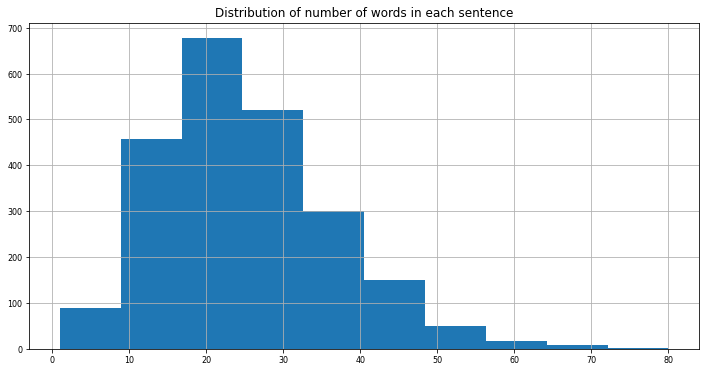

In [10]:
import matplotlib.pyplot as plt

hawking_df['NumWords'] = hawking_df['Sentence'].apply(lambda x: len(x.split()))
hawking_df[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);
plt.title("Distribution of number of words in each sentence")

We can see that on average, there are about 20 words per sentence in this book

In [11]:
hawking_df.head()

Sentence  Sentence_number  \
0  A well-known scientist (some say it was Bertra...                1   
1  He described how the earth orbits around the s...                2   
2  At the end of the lecture, a little old lady a...                3   
3  The world is really a flat plate supported on ...                4   
4  “But it’s turtles all the way down!”  Most peo...                5   

   NumWords  
0        16  
1        28  
2        27  
3        40  
4        32

In [12]:
# Joining all sentences into a string of words so that we can generate a wordcloud out of it
all_words = ' '.join([word for word in hawking_df['Sentence']]).replace('\n', ' ')
all_words[0:1000]

'A well-known scientist (some say it was Bertrand Russell) once gave a public lecture on astronomy. He described how the earth orbits around the sun and how the sun, in turn, orbits around the center of a vast collection of stars called our galaxy. At the end of the lecture, a little old lady at the back of the room got up and said: “What you have told us is rubbish. The world is really a flat plate supported on the back of a giant tortoise.” The scientist gave a superior smile before replying, “What is the tortoise standing on.” “You’re very clever, young man, very clever,” said the old lady. “But it’s turtles all the way down!”  Most people would find the picture of our universe as an infinite tower of tortoises rather ridiculous, but why do we think we know better? What do we know about the universe, and how do we know it? Where did the universe come from, and where is it going? Did the universe have a beginning, and if so, what happened before then? What is the nature of time? Will

#### **Word Cloud generation** 🌐🌩

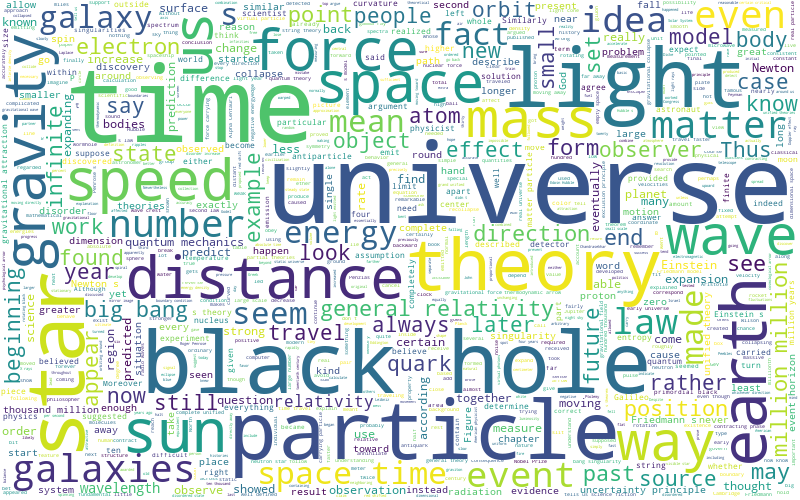

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# To wordcloud's list of stop words, we add a few more that we think are too frequent but are not of any significance to the corpus
stop_words = STOPWORDS.update(["will", "one", "two", "three", "called", "might", "much", "must", "possible", "make", "another", "first" ,"different"])


# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=3000, contour_width=3, contour_color='steelblue', stopwords=stop_words)

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

From the wordcloud, we can tell that this book talks about the universe, black holes, time, light, particles, theories and a lot of Science!
This is good information to deduce the genre of the book - **Popular Science**

In [14]:
#Utility function given by professor to normalize sentences, i.e. make them all lowercase, remove punctuation etc.

import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = ''
    lower = texts.lower()
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
    return no_non_ascii
  
hawking_df['Normalized_sentence'] = hawking_df['Sentence'].apply(normalize_texts)
hawking_df['Normalized_sentence'] = hawking_df['Normalized_sentence'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [15]:
hawking_df.head()

Sentence  Sentence_number  \
0  A well-known scientist (some say it was Bertra...                1   
1  He described how the earth orbits around the s...                2   
2  At the end of the lecture, a little old lady a...                3   
3  The world is really a flat plate supported on ...                4   
4  “But it’s turtles all the way down!”  Most peo...                5   

   NumWords                                Normalized_sentence  
0        16  well known scientist some say was bertrand rus...  
1        28  described how the earth orbits around the sun ...  
2        27  the end the lecture little old lady the back t...  
3        40  the world really flat plate supported the back...  
4        32  but turtles all the way down most people would...

#### **Word Embedding** 
In Natural Language Processing, [word embedding](https://en.wikipedia.org/wiki/Word_embedding) is a term used for the representation of words for text analysis, typically in the form of a real-valued vector. The vectors are embedded in such a way that the ones that are closer to each other in vector space are more similar in meaning to each other.

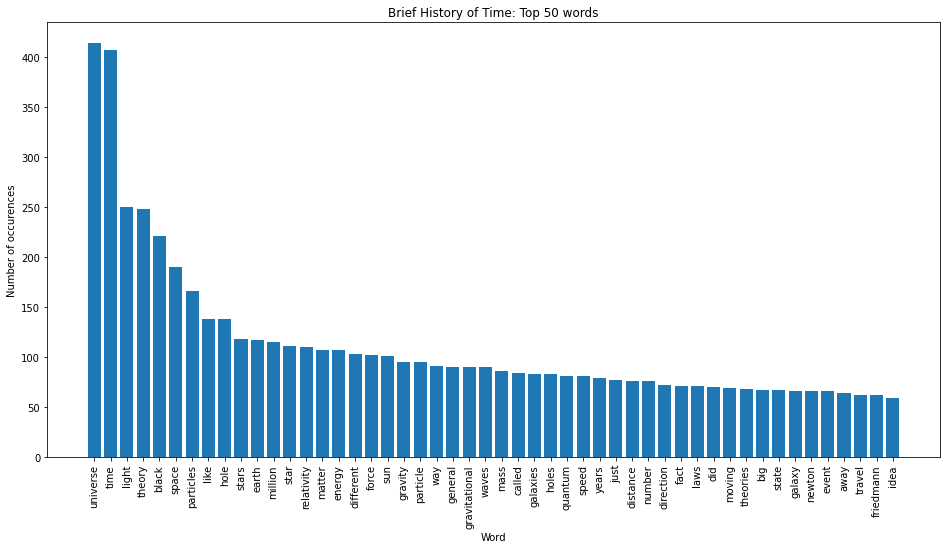

In [16]:
#Utility given by professor to extract the top 50 words from the given text

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

words = []
word_values = []
for i,j in get_top_n_words(hawking_df['Normalized_sentence'], 50):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("Brief History of Time: Top 50 words");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

These are the top 50 words from the book. **Universe, Time, Light, Theory, Space...**

##### **Word2Vec**
Word2Vec is the first neural embedding model (or at least the first, which gained its popularity in 2013) and still the one, which is used by the most of the researchers. There are different types of Word2Vec parameter learning namely:


*   CBOW (Continuous bag of words)
*   Skip-gram

After experimenting with the aforementioned models, we found that Skip-gram words best with our corpus. In Skip-gram architecture, the model uses the current word to predict the surrounding window of context words, i.e. the words that are closest to this given word.



1. **Input Preperation:**  
Word2Vec needs a sequence of sentences as its input, where each sentence is a list of words(UTF-8 encoded strings). We create a custom class below which takes in the corpus(raw text) as input and produces a list of sentences void of punctuation, stop words etc. 

In [17]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
from gensim.parsing.preprocessing import remove_stopwords

#define a custom class to generate sentences from the corpus.
# Word2Vec needs utf-8 encoded words as input, which can be obtained from NLTK sentencizer. It does not accepts plain strings
class HawkingSentencizer(object):
    def __init__(self, corpus):
      self.corpus = corpus
      self.sentence_count = 0

    def __iter__(self):
      raw_sentences = sent_tokenize(self.corpus)
      for sentence in raw_sentences:
        if len(sentence) > 0:
          self.sentence_count += 1
          self.sentence_count +=1
          # simple_preprocess gets rid of some punctuations
          yield simple_preprocess(sentence)

#remove stop words from the raw imported text
processed_text = remove_stopwords(text)
#obtain processed sentences ready to be fed into Word2Vec
processed_sentences = HawkingSentencizer(processed_text)

2. **Training the model:**  
Each sentence that we have created from the corpus is a list of tokens and Word2Vec uses these tokens to generate an internal vocabulary. After this vocabulary is built, we can start training the model. There are multiple params that the Word2Vec() API takes and they have been described below: 

In [19]:
from gensim.models import Word2Vec

# use gensim's Word2Vec API to build a model for our corpus
model = Word2Vec(sg=1, #skip-gram model is used here
                 size=300, #defines the size of the neural net's layers
                 window=10, # window is the number of words before and after the given word to be used as context
                 min_count=3, # words that appear < this val are gotten rid of
                 workers=4) # worker threads used to train the model
model.build_vocab(processed_sentences)
model.train(sentences=processed_sentences, total_examples=model.corpus_count, epochs=model.epochs) #total_examples is the number of sentences, epochs defaults to 5
#save the model for future reference
model.save('Hawking-Vectors.w2v')

3. **Testing the model**  
For testing out the generated model, we can print the five most closest words to each of the first five top 50 words from the corpus we attained from previous cells

In [20]:
[print(word, model.wv.most_similar(word, topn=5)) for word in words[:5]]

universe [('beginning', 0.9979785680770874), ('model', 0.9967465400695801), ('infinite', 0.9966671466827393), ('penrose', 0.9965511560440063), ('showed', 0.996001660823822)]
time [('space', 0.9985203742980957), ('beginning', 0.9977295994758606), ('penrose', 0.9949619174003601), ('universe', 0.994591236114502), ('infinite', 0.9945321679115295)]
light [('speed', 0.998974084854126), ('source', 0.9973347187042236), ('star', 0.9969362616539001), ('wavelength', 0.9967657923698425), ('emitted', 0.9967621564865112)]
theory [('mechanics', 0.9982033371925354), ('quantum', 0.9970510601997375), ('relativity', 0.994066059589386), ('general', 0.9934570789337158), ('principle', 0.9917537569999695)]
black [('hole', 0.997120201587677), ('holes', 0.9910129308700562), ('horizon', 0.9847148060798645), ('entropy', 0.984586238861084), ('area', 0.9817295074462891)]


[None, None, None, None, None]

This tells us that, for instance the word **'universe'** is closest to the words *'beginning'*, *'penrose'*, *'infinite'*, *'model'* and *'time'*

---



4. **Visualization**  
Since the input had 300 dimensions, we need to reduce it to 2 dimensions in order to visualize it.   
This can be achieved using [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)(t-distributed stochastic neighbor embedding ), which is a non-linear dimensionality reduction algorithm that represents data in higher dimensions in lower dimensional space


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


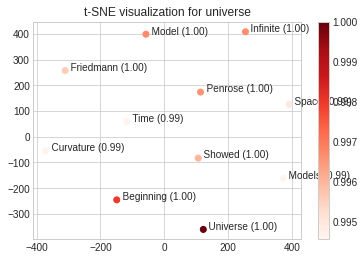

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


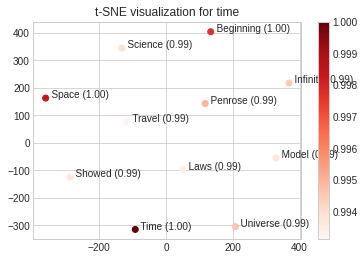

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


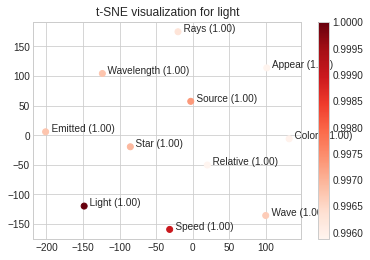

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


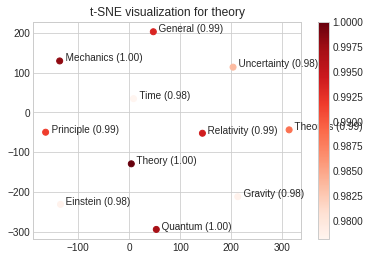

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


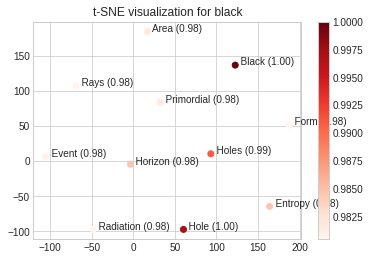

[None, None, None, None, None]

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
plt.style.use('seaborn-whitegrid')

def tsne_scatterplot(model, search_word):
    labels = [search_word]
    tokens = [model.wv[search_word]]
    similar = [1]
    #we get the 10 most similar words to the given search word
    close_words = model.wv.similar_by_word(search_word, topn=10)
    for word in close_words:
        tokens.append(model.wv[word[0]])
        labels.append(word[0])
        similar.append(word[1])

    #we use scikit-learn's TSNE model API for dimensionality reduction
    tsne_model = TSNE(n_components=2, init='pca')
    coordinates = tsne_model.fit_transform(tokens)
    # get the x and y coords of the words
    df = pd.DataFrame({'x': [x for x in coordinates[:, 0]],
                       'y': [y for y in coordinates[:, 1]],
                       'words': labels,
                       'similarity': similar}
                      )
    fig, ax = plt.subplots()
    plot = ax.scatter(df.x, df.y, c=df.similarity, cmap='Reds')
    for i in range(len(df)):
        ax.annotate("  {} ({:.2f})".format(df.words[i].title(),
                                           df.similarity[i]),
                    (df.x[i], df.y[i]))

    plt.colorbar(mappable=plot, ax=ax)
    plt.title('t-SNE visualization for {}'.format(search_word))
    plt.show()
#load the model that we trained earlier on the corpus
model = Word2Vec.load("Hawking-Vectors.w2v")
# get the t-SNE  scatterplot for the top 5 words from the hawking corpus
[tsne_scatterplot(model, word) for word in words[:5]]

##### **TF-IDF**
TF-IDF stands for term frequency-inverse document frequency and it is a measure that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc)  in a document amongst a collection of documents i.e. a corpus

In the following cells, we use scikit-learn's TfidfVectorizer() API to get the TF-IDF values for all the words in our hawking corpus to reveal some interesting insights into the various chapters of the book.

In [22]:
import glob
from pathlib import Path  

directory_path = "data"
file = glob.glob(f"{directory_path}/*.txt")
for i in file:
    print(len(i))
text_files = sorted(glob.glob(f"{directory_path}/*.txt"), key=lambda x : int(x[38:39]) if len(x) == 43 else int(x[38:40]))

43
43
43
43
43
43
43
43
43
44
44
44


In [23]:
text_titles = [Path(text).stem for text in text_files]
text_files

['/content/gdrive/MyDrive/Models/book/ch1.txt',
 '/content/gdrive/MyDrive/Models/book/ch2.txt',
 '/content/gdrive/MyDrive/Models/book/ch3.txt',
 '/content/gdrive/MyDrive/Models/book/ch4.txt',
 '/content/gdrive/MyDrive/Models/book/ch5.txt',
 '/content/gdrive/MyDrive/Models/book/ch6.txt',
 '/content/gdrive/MyDrive/Models/book/ch7.txt',
 '/content/gdrive/MyDrive/Models/book/ch8.txt',
 '/content/gdrive/MyDrive/Models/book/ch9.txt',
 '/content/gdrive/MyDrive/Models/book/ch10.txt',
 '/content/gdrive/MyDrive/Models/book/ch11.txt',
 '/content/gdrive/MyDrive/Models/book/ch12.txt']

In [24]:
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)

# generate a pandas dataframe for the tf-idf values of wordws 
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names())
# get the tf-idf scores of the top 20 words of the corpus and categorize it by chapter. There are 12 chapters in total.
tfidf_slice = tfidf_df[words[:20]]
tfidf_slice.round(decimals=2)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


universe  time  light  theory  black  space  particles  like  hole  \
ch1       0.41  0.20   0.01    0.31   0.00   0.03       0.00  0.02  0.00   
ch2       0.05  0.29   0.38    0.11   0.00   0.24       0.00  0.04  0.00   
ch3       0.40  0.15   0.14    0.10   0.01   0.12       0.01  0.08  0.01   
ch4       0.09  0.08   0.18    0.12   0.02   0.01       0.12  0.02  0.00   
ch5       0.09  0.04   0.03    0.06   0.00   0.00       0.40  0.04  0.00   
ch6       0.04  0.10   0.17    0.05   0.41   0.05       0.03  0.09  0.26   
ch7       0.06  0.06   0.07    0.00   0.52   0.04       0.08  0.06  0.40   
ch8       0.40  0.15   0.14    0.10   0.01   0.12       0.01  0.08  0.01   
ch9       0.25  0.35   0.01    0.04   0.04   0.02       0.02  0.03  0.04   
ch10      0.06  0.37   0.13    0.07   0.07   0.21       0.09  0.09  0.08   
ch11      0.11  0.16   0.01    0.29   0.03   0.15       0.13  0.09  0.02   
ch12      0.22  0.11   0.00    0.09   0.02   0.02       0.02  0.04  0.01   

      stars  earth  million  star  relativity  matter  energy  different  \
ch1    0.20   0.15     0.03  0.03        0.03    0.03    0.01       0.02   
ch2    0.02   0.13     0.00  0.04        0.11    0.02    0.06       0.08   
ch3    0.17   0.06     0.04  0.10        0.06    0.05    0.00       0.07   
ch4    0.00   0.00     0.04  0.01        0.03    0.01    0.09       0.03   
ch5    0.01   0.03     0.09  0.00        0.02    0.15    0.11       0.06   
ch6    0.14   0.03     0.06  0.32        0.06    0.06    0.06       0.02   
ch7    0.01   0.02     0.08  0.00        0.02    0.06    0.14       0.02   
ch8    0.17   0.06     0.04  0.10        0.06    0.05    0.00       0.07   
ch9    0.01   0.01     0.05  0.01        0.01    0.02    0.04       0.02   
ch10   0.00   0.05     0.04  0.01        0.07    0.02    0.10       0.02   
ch11   0.00   0.05     0.11  0.00        0.04    0.02    0.06       0.08   
ch12   0.01   0.03     0.00  0.00        0.02    0.00    0.00       0.01   

      force   sun  gravity  
ch1    0.04  0.11     0.07  
ch2    0.11  0.14     0.04  
ch3    0.01  0.04     0.06  
ch4    0.00  0.03     0.02  
ch5    0.22  0.02     0.05  
ch6    0.02  0.07     0.07  
ch7    0.00  0.01     0.03  
ch8    0.01  0.04     0.06  
ch9    0.00  0.00     0.02  
ch10   0.01  0.00     0.00  
ch11   0.06  0.04     0.07  
ch12   0.01  0.07     0.04

We can see the TF-IDF values for the Top 20 words from the entire corpus, catergorized by chapters of the book.

In [25]:
tfidf_df = tfidf_df.stack().reset_index()
#create a new dataframe that contains the chapter number, the word and its tf-idf score
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})
tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

document        term     tfidf
3592       ch1    universe  0.406258
3444       ch1      theory  0.313926
3269       ch1       stars  0.202030
3468       ch1        time  0.196973
1139       ch1       earth  0.146259
...        ...         ...       ...
31090      ch9   condition  0.174505
31413      ch9  disordered  0.172924
32852      ch9       phase  0.155389
31387      ch9   direction  0.141614
32743      ch9     ordered  0.138339

[120 rows x 3 columns]

In [26]:
#get the top 10 TF-IDF scores of any chapter, for instance chapter 2 here
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)
top_tfidf[top_tfidf['document'].str.contains('ch2')]

document         term     tfidf
5789      ch2        light  0.384251
7261      ch2         time  0.291815
7024      ch2        speed  0.278839
7003      ch2        space  0.241776
4631      ch2  coordinates  0.149239
5051      ch2        event  0.148857
7149      ch2          sun  0.144623
3901      ch2     absolute  0.132890
4932      ch2        earth  0.125205
4829      ch2  dimensional  0.121927

These are 10 words with the highest TF-IDF values in Chapter 2 of the book.

**So what is the significance of having high TF-IDF values?**  
Here's some theory: 
TF-IDF can be broken down into two parts: **TF (term frequency)** and **IDF (inverse document frequency)**.  
The key intuition motivating TF-IDF is the importance of a term is inversely related to its frequency across documents. TF gives us information on how often a term appears in a document and IDF gives us information about the relative rarity of a term in the collection of documents. By multiplying these values together we can get our final TF-IDF value.  
In conclusion: The **higher** the TF-IDF score the more important or relevant the term is; as a term gets less relevant, its TF-IDF score will approach 0.

 

**Visualization TF-IDF**

[Altair](https://altair-viz.github.io/) is an open source declarative stat visualization library for python. We can generate cool heatmaps using this library.  
Let's create a heatmap that visualizes the hight TF-IDF words for each chapter.

In [27]:
import altair as alt
import numpy as np

# Terms in this list will get a red dot in the visualization. Lets go with two terms: 'universe' and 'theory'
term_list = ['universe', 'theory']

# adding a little randomness to break ties in term ranking
top_tfidf_plusRand = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the three superimposed visualizations
(heatmap + circle + text).properties(width = 800)

alt.LayerChart(...)

The heatmap that was generated above helps us visualize the top TF-IDF words for each chapter. We have the 10 most important words for each chapter here. We can easily deduce the following:   

*   **Chapter 1** is gives a general view of the *universe in general*.
*   **Chapter 2** is about *light, time and space*
*   **Chapter 3** about *friedmann* and *galaxies*
*   **Chapter 4** talks about *Galileo* and *various theories*
*   **Chapter 5** is about *particles* and *quarks*
*   **Chapter 6 and 7** revolve around *black holes*
*   **Chapter 8** talks about *galaxies* and the *universe*
*   **Chapter 9** is about *time arrows* 
*   **Chapter 10** is about *time travel* 
*   **Chapter 11** is about *string theory* 
*   **Chapter 12** is about the *universe* again


Which are pretty close to the names of the actual chapters!  
<img src='https://drive.google.com/uc?id=1fv4124-2Rb5Arx534RkdZmDgZ7UNnAyg' width=500 height=500>




### **Sentiment Analysis** <😃😐😠😨😞😯>
--- 

<img src='https://drive.google.com/uc?id=1TiotJjcIh9hu8Km5IwhmkKo2F5UuP2X9'>

In [28]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentAnalyser = SentimentIntensityAnalyzer()

# function that gets the overall sentiment score of a given piece of text. It ranges between -1 and 1.
# Values close to 1 signify a positive tone to the sentence, values close to -1 signify a negative tone.
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [30]:
# create a new column for the existing dataframe called 'Sentiment_score' that holds the compund sentiment score from VADER
hawking_df['Sentiment_score'] = hawking_df['Sentence'].apply(calculate_sentiment)

The 10 most positive and reassuring sentences in the book are:

In [31]:
hawking_df.sort_values(by='Sentiment_score', ascending=False)[:10]

Sentence  Sentence_number  \
2227  Throughout his life, Einstein’s efforts toward...             2228   
1872  Ordi-nary matter, which has a positive energy ...             1873   
1967  Ultimately, however, one would hope to find a ...             1968   
1172  And to be visible at such a great distance, th...             1173   
2264  It is remarkable, however, that most of the ar...             2265   
3     The world is really a flat plate supported on ...                4   
1976  Then again, in 1928, physicist and Nobel Prize...             1977   
937   But a machine that was powerful enough to acce...              938   
927   The success of the unification of the electrom...              928   
1179  This was bad news for writers of space western...             1180   

      NumWords                                Normalized_sentence  \
2227        20  throughout his life einstein efforts toward pe...   
1872        19  ordi nary matter which has positive energy den...   
1967        44  ultimately however one would hope find complet...   
1172        26  and visible such great distance the object mus...   
2264        30  remarkable however that most the articles appe...   
3           40  the world really flat plate supported the back...   
1976        47  then again physicist and nobel prize winner ma...   
937         38  but machine that was powerful enough accelerat...   
927         38  the success the unification the electromagneti...   
1179        36  this was bad news for writers space westerns b...   

      Sentiment_score  
2227           0.9136  
1872           0.8979  
1967           0.8957  
1172           0.8932  
2264           0.8932  
3              0.8908  
1976           0.8860  
937            0.8847  
927            0.8750  
1179           0.8747

The 10 most negative and adverse sentences in the book are:

In [32]:
hawking_df.sort_values(by='Sentiment_score', ascending=True)[:10]

Sentence  Sentence_number  \
2226  But even before the first atomic bomb had been...             2227   
2237  But the Church was afraid of a scandal that mi...             2238   
1839  But there would not be much joy in returning f...             1840   
2032  Scherk died in tragic circumstances (he suffer...             2033   
1070  After the war the problem of gravitational col...             1071   
1106  Strictly, this is what is known as the weak co...             1107   
787   There had been a bitter dispute in the college...              788   
2249  Four years before his death in 1642, while he ...             2250   
1065  The hostility of other scientists, particularl...             1066   
1058  In some cases they may explode or manage to th...             1059   

      NumWords                                Normalized_sentence  \
2226        27  but even before the first atomic bomb had been...   
2237        20  but the church was afraid scandal that might u...   
1839        33  but there would not much joy returning from sp...   
2032        26  scherk died tragic circumstances suffered from...   
1070        29  after the war the problem gravitational collap...   
1106        50  strictly this what known the weak cosmic censo...   
787         39  there had been bitter dispute the college ever...   
2249        28  four years before his death while was still un...   
1065        42  the hostility other scientists particularly ed...   
1058        42  some cases they may explode manage throw off e...   

      Sentiment_score  
2226          -0.9657  
2237          -0.9269  
1839          -0.9013  
2032          -0.9001  
1070          -0.8934  
1106          -0.8573  
787           -0.8555  
2249          -0.8428  
1065          -0.8316  
1058          -0.8217

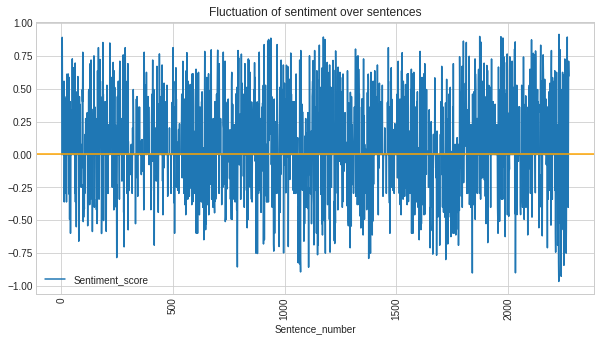

In [33]:
import matplotlib.pyplot as plt

ax = hawking_df.plot(x='Sentence_number', y='Sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Fluctuation of sentiment over sentences')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-')

This seems to look super random. Lets try to visualize it in another way. Rather than looking at the sentiment score of each sentence individually, we can get the average score over a rolling window of say 25 sentences and plot that.

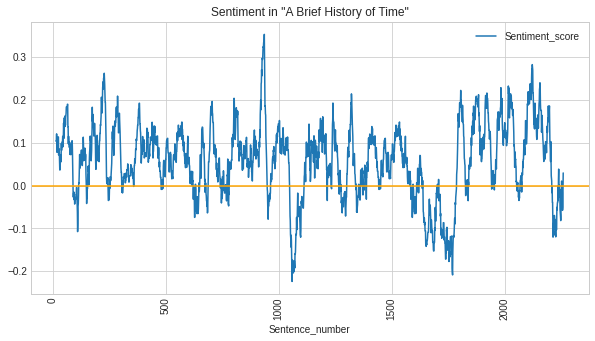

In [34]:
# Get averages for a rolling window, then plot
#try to modify it by getting the average number of words per para and do a sentiment analysis by a rolling average over that time.
hawking_df.rolling(25).mean().plot(x='Sentence_number', y='Sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "A Brief History of Time"')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-');

There are a lot more positive peaks than negative ones, which indicates that the overall tone of the book is positive and efficacious.

### **Analysis with spaCy**


#### **ScatterText**

Scattertext is a tool that's used to visualize the key terms of a corpus in interactive HTML. We leverage this library for generating a scatterplot of words in a cool way

In [35]:
!pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached gensim-4.2.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (24.1 MB)
  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.3
    Uninstalling gensim-3.8.3:
      Successfully uninstalled gensim-3.8.3


In [36]:
# load the small english model from scaCy
import spacy
nlp = spacy.load('en_core_web_sm')

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Prepare a new column in our existing `hawking_df` dataframe called `Label`, which is binary and has two values: 0 and 1. By leveraging VADER's sentiment analysis, we get the overall sentiment which is the compound score and assign 1 as the label if its positive/0 and 0 if its negative.

In [37]:
sentiment_labels = []
# Get each sentence and sentence number, which is what enumerate does
for number, sentence in enumerate(sentences):
    # Use VADER to calculate sentiment
    scores = sentimentAnalyser.polarity_scores(sentence)
    # Make dictionary and append it to the previously empty list
    sentiment_labels.append(1 if scores['compound'] >=0 else 0)

In [38]:
hawking_df['Label'] = sentiment_labels
hawking_df[:20]

Sentence  Sentence_number  \
0   A well-known scientist (some say it was Bertra...                1   
1   He described how the earth orbits around the s...                2   
2   At the end of the lecture, a little old lady a...                3   
3   The world is really a flat plate supported on ...                4   
4   “But it’s turtles all the way down!”  Most peo...                5   
5   What do we know about the universe, and how do...                6   
6   Where did the universe come from, and where is...                7   
7   Did the universe have a beginning, and if so, ...                8   
8                         What is the nature of time?                9   
9                        Will it ever come to an end?               10   
10                            Can we go back in time?               11   
11  Recent breakthroughs in physics, made possible...               12   
12  Someday these answers may seem as obvious to u...               13   
13        Only time (whatever that may be) will tell.               14   
14  As long ago as 340 BC the Greek philosopher Ar...               15   
15  First, he realized that eclipses of the moon w...               16   
16  The earth’s shadow on the moon was always roun...               17   
17  If the earth had been a flat disk, the shadow ...               18   
18  Second, the Greeks knew from their travels tha...               19   
19  (Since the North Star lies over the North Pole...               20   

    NumWords                                Normalized_sentence  \
0         16  well known scientist some say was bertrand rus...   
1         28  described how the earth orbits around the sun ...   
2         27  the end the lecture little old lady the back t...   
3         40  the world really flat plate supported the back...   
4         32  but turtles all the way down most people would...   
5         13          what know about the universe and how know   
6         11   where did the universe come from and where going   
7         13  did the universe have beginning and what happe...   
8          6                               what the nature time   
9          7                                 will ever come end   
10         6                                      can back time   
11        20  recent breakthroughs physics made possible par...   
12        25  someday these answers may seem obvious the ear...   
13         8              only time whatever that may will tell   
14        38  long ago the greek philosopher aristotle his b...   
15        20  first realized that eclipses the moon were cau...   
16        19  the earth shadow the moon was always round whi...   
17        35  the earth had been flat disk the shadow would ...   
18        28  second the greeks knew from their travels that...   
19        36  since the north star lies over the north pole ...   

    Sentiment_score  Label  
0            0.0000      1  
1            0.0000      1  
2            0.0000      1  
3            0.8908      1  
4            0.5255      1  
5            0.0000      1  
6            0.0000      1  
7            0.0000      1  
8            0.0000      1  
9            0.0000      1  
10           0.0000      1  
11           0.5574      1  
12          -0.3612      0  
13           0.0000      1  
14           0.4404      1  
15           0.0000      1  
16           0.4215      1  
17           0.0000      1  
18          -0.2960      0  
19          -0.2263      0

Prepare a new column in our existing `hawking_df` dataframe called `Label_String`, which is binary and has two values: `Positive` and `Negative`.
This is needed because the following APIs need to work of String data and are not compatible with the `Label` field which is integer

In [39]:
label_str = []
for str in hawking_df.Label:
  if(str == 0):
    label_str.append('Negative')
  else: label_str.append('Positive')

hawking_df['Label_String'] = label_str

In [40]:
hawking_df

Sentence  Sentence_number  \
0     A well-known scientist (some say it was Bertra...                1   
1     He described how the earth orbits around the s...                2   
2     At the end of the lecture, a little old lady a...                3   
3     The world is really a flat plate supported on ...                4   
4     “But it’s turtles all the way down!”  Most peo...                5   
...                                                 ...              ...   
2267  But that was not all: Newton then wrote the co...             2268   
2268  Still unsatisfied, he then wrote an anonymous ...             2269   
2269  Following the death of Leibniz, Newton is repo...             2270   
2270  He had been active in anti-Catholic politics a...             2271   
2271  Here he used his talents for deviousness and v...             2272   

      NumWords                                Normalized_sentence  \
0           16  well known scientist some say was bertrand rus...   
1           28  described how the earth orbits around the sun ...   
2           27  the end the lecture little old lady the back t...   
3           40  the world really flat plate supported the back...   
4           32  but turtles all the way down most people would...   
...        ...                                                ...   
2267        24  but that was not all newton then wrote the com...   
2268        17  still unsatisfied then wrote anonymous review ...   
2269        35  following the death leibniz newton reported ha...   
2270        27  had been active anti catholic politics cambrid...   
2271        32  here used his talents for deviousness and vitr...   

      Sentiment_score  Label Label_String  
0              0.0000      1     Positive  
1              0.0000      1     Positive  
2              0.0000      1     Positive  
3              0.8908      1     Positive  
4              0.5255      1     Positive  
...               ...    ...          ...  
2267          -0.2617      0     Negative  
2268          -0.4019      0     Negative  
2269           0.2500      1     Positive  
2270           0.7096      1     Positive  
2271           0.5965      1     Positive  

[2272 rows x 7 columns]

Now, we will get rid of a bunch of stop words from the corpus using a custom text file that we prepared and NLTK's stopwords. We get the term frequency and scaled f-score for each word and create data frames for Positive and Negative words.

In [41]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import scattertext as st

# read the custom file with a bunch of stopwords
with open('stopwords.txt', 'r') as f:
    str_f = f.read()
    file_stopwords = set(str_f.split('\n'))

# append to NLTK's stopwords the custom stopwords too
stopWords = set(stopwords.words('english'))
stopWords |= nlp.Defaults.stop_words
stopWords |= file_stopwords

#pass in hawking_df dataframe generate a new corpus object, with the category as the label in string form and the column with the raw corpus(sentences)
def term_freq(hawking_df):
    corpus = (st.CorpusFromPandas(hawking_df,
                                           category_col='Label_String', 
                                           text_col='Sentence',
                                           nlp=nlp)
              .build()
              .remove_terms(stopWords, ignore_absences=True) #pass in the custom stopwords here
              )
    df = corpus.get_term_freq_df()
    # get all the scaled f scores of the positive words
    df['Positive'] = corpus.get_scaled_f_scores('Positive')
    # get all the scaled f scores of the negative words
    df['Negative'] = corpus.get_scaled_f_scores('Negative')
    #round them up
    df['Positive'] = round(df['Positive'], 2)
    df['Negative'] = round(df['Negative'], 2)
    
    #sort in descending order and return them back along with the generated corpus object
    df_positive = df.sort_values(by='Positive freq', 
                             ascending = False).reset_index()
    df_negative = df.sort_values(by='Negative freq', 
                            ascending=False).reset_index()
    return df_positive, df_negative, corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
hawking_positive, hawking_negative, corpus = term_freq(hawking_df)

In [43]:
hawking_positive.head(10)

term  Positive freq  Negative freq  Positive  Negative
0      universe            311            103      0.90      0.10
1          time            306            101      0.90      0.10
2  the universe            258             80      0.91      0.09
3         light            211             39      0.95      0.05
4        theory            190             58      0.91      0.09
5         black            154             67      0.16      0.84
6         space            148             42      0.92      0.08
7     particles            128             38      0.91      0.09
8      the same            120             30      0.93      0.07
9         earth            100             17      0.95      0.05

In [44]:
hawking_negative.head(10)

term  Positive freq  Negative freq  Positive  Negative
0      universe            311            103      0.90      0.10
1          time            306            101      0.90      0.10
2  the universe            258             80      0.91      0.09
3         black            154             67      0.16      0.84
4        theory            190             58      0.91      0.09
5          hole             94             44      0.15      0.85
6    black hole             91             43      0.15      0.85
7         space            148             42      0.92      0.08
8          star             69             42      0.12      0.88
9         light            211             39      0.95      0.05

**Visualization**  
Best part of the scattertext lib is we can visualize the most prevelant words and their corresponding queries. We can do a lot more like query for a particle word and see its usage in the sentences of the corpus too!

In [45]:
html = st.produce_scattertext_explorer(
                   corpus,
                   category='Positive',
                   category_name='Positive Words',
                   not_category_name='Negative',
                   width_in_pixels=1000,
                   metadata=hawking_df['Sentence']
                   )

In [10]:
from IPython.core.display import display, HTML

file_name = "hawking-vis.html"

with open(file_name, "wb") as f:
    f.write(html.encode("utf-8"))

display(HTML('hawking-vis.html'))

/var/folders/lc/lgmlfvyn1w3_nn7xbl75gt200000gn/T/ipykernel_889/3759416106.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


#### **Main scientists**

In [47]:
text = '.'.join(hawking_sentences)
nlp = spacy.load('en_core_web_sm')
processed_text = nlp(text)

In [48]:
# Extract all the personal names and count their occurrences. 
# Expected output is a list in the following form: [('xxx', 622), ('yyy', 312), ('zzz', 286), ...].

from collections import Counter, defaultdict

def find_character_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.
    
    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('xxx', 622), ('yyy', 312), ('zzz', 286), ...]
    """
    characters = Counter()
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            characters[ent.lemma_] += 1
            
    return characters.most_common()

print(find_character_occurences(processed_text)[:10])

[('Einstein', 40), ('Aristotle', 17), ('Roger Penrose', 8), ('Doppler', 8), ('Edwin Hubble', 5), ('Laplace', 5), ('Godel', 5), ('Alpha Centauri', 4), ('Alexander Friedmann', 4), ('Heisenberg', 4)]


### **Topic Modelling**
---


<img src='https://drive.google.com/uc?id=1k-LLFE0DzQ6anDfcqO599awiHpy9a5mr' width=800 height=400>

Topic modeling is an **unsupervised machine learning** technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents.  
Its `unsupervised` because it doesn’t require a predefined list of tags or training data that’s been previously classified by humans.

#### **Latent Dirichlet allocation (LDA)**
Latent Dirichlet Allocation is a popular topic modeling technique to extract topics from a given corpus. Fun fact: since the term `latent` basically means hidden, and the topics that we want to extract from the data are also “hidden topics”. It is yet to be discovered. Hence, the term “latent” in LDA. The Dirichlet allocation is after the Dirichlet distribution and process.


We perform LDA on our hawking corpus using two models:
1.   **MALLET (MAchine Learning for LanguagE Toolkit)**
2.   **Standart LDA (Gensim)**

The difference between Mallet and Gensim’s standard LDA is that Gensim uses a Variational Bayes sampling method which is faster but less precise that Mallet’s Gibbs Sampling.



##### **MALLET**
This is a Java-based package for NLP. More about it can be found [here](https://mimno.github.io/Mallet/).  
Fortunately, there's a neat wrapper called [`little-mallet-wrapper`](https://github.com/maria-antoniak/little-mallet-wrapper) that works really well in python!

In [ ]:
!pip install gensim==3.8.3

In [50]:
!pip install little_mallet_wrapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

In [52]:
#download an install a JDK. This is only needed to run on collab. Comment out for local envs
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

In [54]:
directory = "data"
files = sorted(glob.glob(f"{directory}/*.txt"), key=lambda x : int(x[38:39]) if len(x) == 43 else int(x[38:40]))
files

['/content/gdrive/MyDrive/Models/book/ch1.txt',
 '/content/gdrive/MyDrive/Models/book/ch2.txt',
 '/content/gdrive/MyDrive/Models/book/ch3.txt',
 '/content/gdrive/MyDrive/Models/book/ch4.txt',
 '/content/gdrive/MyDrive/Models/book/ch5.txt',
 '/content/gdrive/MyDrive/Models/book/ch6.txt',
 '/content/gdrive/MyDrive/Models/book/ch7.txt',
 '/content/gdrive/MyDrive/Models/book/ch8.txt',
 '/content/gdrive/MyDrive/Models/book/ch9.txt',
 '/content/gdrive/MyDrive/Models/book/ch10.txt',
 '/content/gdrive/MyDrive/Models/book/ch11.txt',
 '/content/gdrive/MyDrive/Models/book/ch12.txt']

In [55]:
#set the path to MALLET
path_to_mallet = '/content/mallet-2.0.8/bin/mallet'

In [56]:
text = '.'.join(hawking_sentences)
processed_text = remove_stopwords(text)
little_mallet_wrapper.process_string(text, numbers='remove')

'well known scientist say bertrand russell gave public lecture astronomy described earth orbits around sun sun turn orbits around center vast collection stars called galaxy end lecture little old lady back room got said told rubbish world really flat plate supported back giant tortoise scientist gave superior smile replying tortoise standing clever young man clever said old lady turtles way people would find picture universe infinite tower tortoises rather ridiculous think know better know universe know universe come going universe beginning happened nature time ever come end back time recent breakthroughs physics made possible part fantastic new technologies suggest answers longstanding questions someday answers may seem obvious earth orbiting sun perhaps ridiculous tower tortoises time whatever may tell long ago greek philosopher aristotle book heavens able put forward two good arguments believing earth round sphere rather hat plate first realized eclipses moon caused earth coming su

In [57]:
training_data = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)

In [58]:
original_texts = []
for file in files:
    text = open(file, encoding='utf-8').read()
    original_texts.append(text)

In [59]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 12
Mean Number of Words per Document: 2352.3
Vocabulary Size: 3818


In [60]:
#set the number of topics to output
num_topics = 15

#Change to your desired output directory
output_directory_path = '/content'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.15"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.15"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.15"

In [61]:
# try removing more stop works from the corpus
# train the model on the given corpus
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                             output_directory_path,
                                             num_topics,
                                             training_data)

Importing data...
Complete
Training topic model...
Complete


([['string',
   'theory',
   'dimensions',
   'theories',
   'space',
   'three',
   'strings',
   'dimensional',
   'infinities',
   'unified',
   'extra',
   'forces',
   'observations',
   'different',
   'seem',
   'curled',
   'straw',
   'ring',
   'closed',
   'dimension'],
  ['light',
   'time',
   'space',
   'speed',
   'one',
   'event',
   'sun',
   'relativity',
   'mass',
   'force',
   'body',
   'two',
   'earth',
   'newton',
   'absolute',
   'bodies',
   'position',
   'would',
   'moving',
   'distance'],
  ['light',
   'like',
   'must',
   'gravitational',
   'could',
   'waves',
   'relativity',
   'eventually',
   'away',
   'matter',
   'years',
   'thousand',
   'fact',
   'rate',
   'sun',
   'singularity',
   'form',
   'evidence',
   'therefore',
   'galaxy'],
  ['time',
   'travel',
   'space',
   'back',
   'light',
   'virtual',
   'allow',
   'past',
   'might',
   'possible',
   'histories',
   'plates',
   'particle',
   'future',
   'moving',
   'his

**Results**

In [62]:
#load all the topics
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['string', 'theory', 'dimensions', 'theories', 'space', 'three', 'strings', 'dimensional', 'infinities', 'unified', 'extra', 'forces', 'observations', 'different', 'seem', 'curled', 'straw', 'ring', 'closed', 'dimension']

✨Topic 1✨

['light', 'time', 'space', 'speed', 'one', 'event', 'sun', 'relativity', 'mass', 'force', 'body', 'two', 'earth', 'newton', 'absolute', 'bodies', 'position', 'would', 'moving', 'distance']

✨Topic 2✨

['light', 'like', 'must', 'gravitational', 'could', 'waves', 'relativity', 'eventually', 'away', 'matter', 'years', 'thousand', 'fact', 'rate', 'sun', 'singularity', 'form', 'evidence', 'therefore', 'galaxy']

✨Topic 3✨

['time', 'travel', 'space', 'back', 'light', 'virtual', 'allow', 'past', 'might', 'possible', 'histories', 'plates', 'particle', 'future', 'moving', 'history', 'speed', 'wormhole', 'positive', 'curvature']

✨Topic 4✨

['black', 'star', 'hole', 'would', 'holes', 'stars', 'mass', 'collapse', 'gravitational', 'might', 'chandrasekhar',

Since we specified the number of topics to generate(15, picked arbitrarily), MALLET generated these topics and we can see the words associated with each of these topics.

In [63]:
# use this API to get the distributions of the topics across each chapter and their probabilities
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

We can also pick any chapter, say `Chapter 1` and obtain the probability for each of the given topics to reside within that chapter!

In [64]:
chapter_number = 0

print(f"Topic Distributions for Chapter 1\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[chapter_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for Chapter 1

✨Topic 0 ['string', 'theory', 'dimensions', 'theories', 'space', 'three'] ✨
Probability: 0.0

✨Topic 1 ['light', 'time', 'space', 'speed', 'one', 'event'] ✨
Probability: 0.029

✨Topic 2 ['light', 'like', 'must', 'gravitational', 'could', 'waves'] ✨
Probability: 0.029

✨Topic 3 ['time', 'travel', 'space', 'back', 'light', 'virtual'] ✨
Probability: 0.0

✨Topic 4 ['black', 'star', 'hole', 'would', 'holes', 'stars'] ✨
Probability: 0.0

✨Topic 5 ['particles', 'force', 'quarks', 'particle', 'matter', 'spin'] ✨
Probability: 0.0

✨Topic 6 ['universe', 'friedmann', 'galaxies', 'stars', 'bang', 'big'] ✨
Probability: 0.028

✨Topic 7 ['black', 'hole', 'holes', 'would', 'mass', 'event'] ✨
Probability: 0.0

✨Topic 8 ['waves', 'quantum', 'light', 'position', 'orbits', 'electrons'] ✨
Probability: 0.016

✨Topic 9 ['would', 'one', 'two', 'million', 'particles', 'principle'] ✨
Probability: 0.068

✨Topic 10 ['newton', 'laws', 'book', 'theories', 'einstein', 'unified'] ✨


We can deduce that `Chapter 1` has a lot of words from Topic 3 and Topic 5

**Visualization**  
We can also generate a heatmap for all the topics and chapters using the built in APIs from the wrapper.

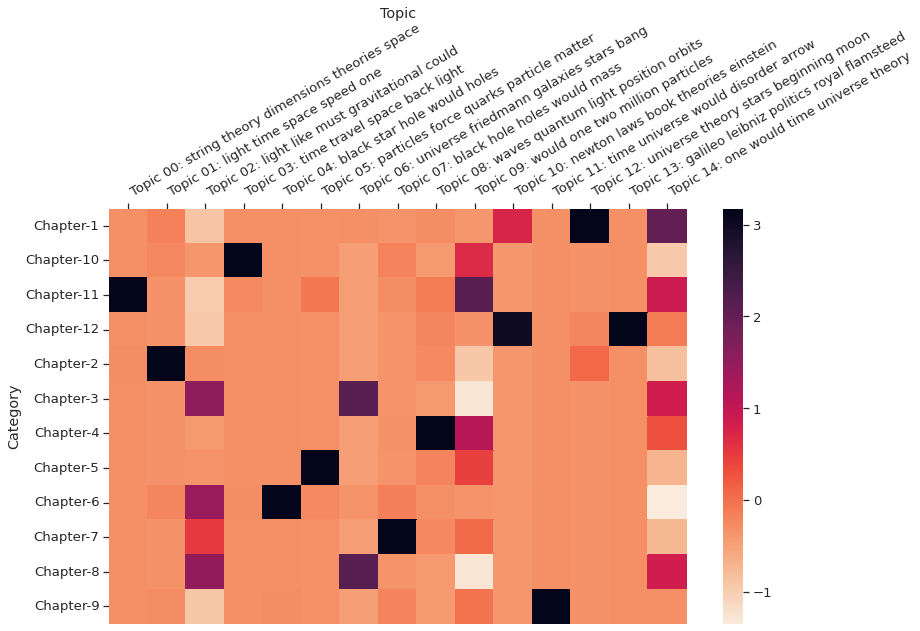

In [65]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(["Chapter-1","Chapter-2","Chapter-3","Chapter-4",
                                                         "Chapter-5","Chapter-6","Chapter-7","Chapter-8",
                                                         "Chapter-9","Chapter-10","Chapter-11","Chapter-12"],
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      dim= (13, 9))

We can see each chapter and its most prevalant topics in this heatmap :)

In [66]:
training_data_chp_titles = dict(zip(training_data, ["Chapter-1","Chapter-2","Chapter-3","Chapter-4",
                                                     "Chapter-5","Chapter-6","Chapter-7","Chapter-8",
                                                     "Chapter-9","Chapter-10","Chapter-11","Chapter-12"]))
training_data_original_text = dict(zip(training_data, original_texts))

Digging in further, we can also look at chapter wise probability distributions of each topic.  
Lets explore how `Topic 3` distributes across all the chapters!

In [67]:
def display_top_titles_per_topic(topic_number=1, number_of_documents=12):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 13), training_data_chp_titles[document] + "\n")
    return

In [68]:
display_top_titles_per_topic(topic_number=3, number_of_documents=12)

✨Topic 3✨

['time', 'travel', 'space', 'back', 'light', 'virtual', 'allow', 'past', 'might', 'possible', 'histories', 'plates', 'particle', 'future', 'moving', 'history', 'speed', 'wormhole', 'positive', 'curvature']

0.5078676500437 Chapter-10

0.008314151622 Chapter-11

0.0022639313191 Chapter-6

3.15467108e-05 Chapter-4

3.03206425e-05 Chapter-12

2.43581871e-05 Chapter-9

1.95327896e-05 Chapter-1

1.93964712e-05 Chapter-7

1.56987864e-05 Chapter-8

1.56987864e-05 Chapter-8

1.49947358e-05 Chapter-5

1.49896813e-05 Chapter-2



Its easy to deduce that Hawking primarily takes about the universe in general in Chapters 1 and 12. This is the case cause Chapter 1 of the book is called `Our Picture of the Universe` and Chapter 12 being the conclusion is more generic and talks about the universe as a whole.

Lets look at Chapter Highlighting now. This means we want to take a given topic and highlight all the words of that topic in a given number of chapters where it has the highest probability of showing up.  
For instance, let's say we want to highlight all words that are part of  `Topic 3` in the chapter which has the highest probability of words from said topic.

In [69]:
from IPython.display import Markdown, display
import re

#utility function that takes in a given topic, the given number of documents and highlights the words from the given topic
# in the top number_of_documents documents of the book.
def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=12, custom_words=None):

    # we leverage the get_top_docs API of the wrapper here
    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
        print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
        
        #print out the probability of the given topic in the current document
        probability = f"✨✨✨\n\n**{probability}**"
        chp_title = f"**{training_data_chp_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

        display(Markdown(probability)), display(Markdown(chp_title)), display(Markdown(original_text))
    return

In [70]:
display_bolded_topic_words_in_context(topic_number=3, number_of_documents=1)

✨Topic 3✨

['time', 'travel', 'space', 'back', 'light', 'virtual', 'allow', 'past', 'might', 'possible', 'histories', 'plates', 'particle', 'future', 'moving', 'history', 'speed', 'wormhole', 'positive', 'curvature']



✨✨✨

**0.5078676500437066**

**Chapter-10**

The last chapter discussed why we see **time** go forward: why disorder increases and why we remember the **past** but not the **future**. Time was treated as if it were a straight railway line on which one could only go one way or the other.

But what if the railway line had loops and branches so that a train could keep going forward but come **back** to a station it had already passed? In other words, **might** it be **possible** for someone to **travel** into the **future** or the **past**?

H. G. Wells in The Time Machine explored these possibilities as have countless other writers of science fiction. Yet many of the ideas of science fiction, like submarines and **travel** to the moon, have become matters of science fact. So what are the prospects for **time** **travel**?
The first indication that the laws of physics **might** really **allow** people to **travel** in **time** came in 1949 when Kurt Godel discovered a new **space**-**time** allowed by general relativity. Godel was a mathematician who was famous for proving that it is impossible to prove all true statements, even if you limit yourself to trying to prove all the true statements in a subject as apparently cut and dried as arithmetic. Like the uncertainty principle, Godel’s incompleteness theorem may be a fundamental limitation on our ability to understand and predict the universe, but so far at least it hasn’t seemed to be an obstacle in our search for a complete unified theory.

Godel got to know about general relativity when he and Einstein spent their later years at the Institute for Advanced Study in Princeton. His **space**-**time** had the curious property that the whole universe was rotating. One **might** ask: “Rotating with respect to what?” The answer is that distant matter would be rotating with respect to directions that little tops or gyroscopes point in.
This had the side effect that it would be **possible** for someone to go off in a rocket ship and return to earth before he set out. This property really upset Einstein, who had thought that general relativity wouldn’t **allow** **time** **travel**. However, given Einstein’s record of ill-founded opposition to gravitational collapse and the uncertainty principle, maybe this was an encouraging sign. The solution Godel found doesn’t correspond to the universe we live in because we can show that the universe is not rotating. It also had a non-zero value of the cosmological constant that Einstein introduced when he thought the universe was unchanging. After Hubble discovered the expansion of the universe, there was no need for a cosmological constant and it is now generally believed to be zero. However, other more reasonable **space**-times that are allowed by general relativity and which permit **travel** into the **past** have since been found. One is in the interior of a rotating black hole. Another is a **space**-**time** that contains two cosmic strings **moving** **past** each other at high **speed**. As their name suggests, cosmic strings are objects that are like string in that they have length but a tiny cross section. Actually, they are more like rubber bands because they are under enormous tension, something like a million million million million tons. A cosmic string attached to the earth could accelerate it from 0 to 60 mph in 1/30th of a second. Cosmic strings may sound like pure science fiction but there are reasons to believe they could have formed in the early universe as a result of symmetry-breaking of the kind discussed in Chapter 5. Because they would be under enormous tension and could start in any configuration, they **might** accelerate to very high speeds when they straighten out.

The Godel solution and the cosmic string **space**-**time** start out so distorted that **travel** into the **past** was always **possible**. God **might** have created such a warped universe but we have no reason to believe he did. Observations of the microwave background and of the abundances of the **light** elements indicate that the early universe did not have the kind of **curvature** required to **allow** **time** **travel**. The same conclusion follows on theoretical grounds if the no boundary proposal is correct. So the question is: if the universe starts out without the kind of **curvature** required for **time** **travel**, can we subsequently warp local regions of **space**-**time** sufficiently to **allow** it?

A closely related problem that is also of concern to writers of science fiction is rapid interstellar or intergalactic **travel**. According to relativity, nothing can **travel** faster than **light**. If we therefore sent a spaceship to our nearest neighboring star, Alpha Centauri, which is about four **light**-years away, it would take at least eight years before we could expect the travelers to return and tell us what they had found. If the expedition were to the center of our galaxy, it would be at least a hundred thousand years before it came **back**. The theory of relativity does **allow** one consolation. This is the so-called twins paradox mentioned in Chapter 2.

Because there is no unique standard of **time**, but rather observers each have their own **time** as measured by clocks that they carry with them, it is **possible** for the journey to seem to be much shorter for the **space** travelers than for those who remain on earth. But there would not be much joy in returning from a **space** voyage a few years older to find that everyone you had left behind was dead and gone thousands of years ago. So in order to have any human interest in their stories, science fiction writers had to suppose that we would one day discover how to **travel** faster than **light**. What most of thee authors don’t seem to have realized is that if you can **travel** faster than **light**, the theory of relativity implies you can also **travel** **back** in the, as the following limerick says:
There was a young lady of Wight Who traveled much faster than **light**. She departed one day, In a relative way, And arrived on the previous night The point is that the theory of relativity says hat there is no unique measure of **time** that all observers will agree on Rather, each observer has his or her own measure of **time**. If it is **possible** for a rocket traveling below the **speed** of **light** to get from event A (say, the final of the 100-meter race of the Olympic Games in 202) to event B (say, the opening of the 100,004th meeting of the Congress of Alpha Centauri), then all observers will agree that event A happened before event B according to their times. Suppose, however, that the spaceship would have to **travel** faster than **light** to carry the news of the race to the Congress. Then observers **moving** at different speeds can disagree about whether event A occurred before B or vice versa. According to the **time** of an observer who is at rest with respect to the earth, it may be that the Congress opened after the race. Thus this observer would think that a spaceship could get from A to B in **time** if only it could ignore the **speed**-of-**light** **speed** limit. However, to an observer at Alpha Centauri **moving** away from the earth at nearly the **speed** of **light**, it would appear that event B, the opening of the Congress, would occur before event A, the 100-meter race. The theory of relativity says that the laws of physics appear the same to observers **moving** at different speeds.
This has been well tested by experiment and is likely to remain a feature even if we find a more advanced theory to replace relativity Thus the **moving** observer would say that if faster-than-**light** **travel** is **possible**, it should be **possible** to get from event B, the opening of the Congress, to event A, the 100-meter race. If one went slightly faster, one could even get **back** before the race and place a bet on it in the sure knowledge that one would win.

There is a problem with breaking the **speed**-of-**light** barrier. The theory of relativity says that the rocket power needed to accelerate a spaceship gets greater and greater the nearer it gets to the **speed** of **light**. We have experimental evidence for this, not with spaceships but with elementary particles in **particle** accelerators like those at Fermilab or CERN (European Centre for Nuclear Research). We can accelerate particles to 99.99 percent of the **speed** of **light**, but however much power we feed in, we can’t get them beyond the **speed**-of-**light** barrier. Similarly with spaceships: no matter how much rocket power they have, they can’t accelerate beyond the **speed** of **light**.

That **might** seem to rule out both rapid **space** **travel** and **travel** **back** in **time**. However, there is a **possible** way out. It **might** be that one could warp **space**-**time** so that there was a shortcut between A and B One way of doing this would be to create a **wormhole** between A and B. As its name suggests, a **wormhole** is a thin tube of **space**-**time** which can connect two nearly flat regions far apart.
There need be no relation between the distance through the **wormhole** and the separation of its ends in the nearly Hat background. Thus one could imagine that one could create or find a **wormhole** that world lead from the vicinity of the Solar System to Alpha Centauri. The distance through the **wormhole** **might** be only a few million miles even though earth and Alpha Centauri are twenty million million miles apart in ordinary **space**. This would **allow** news of the 100-meter race to reach the opening of the Congress. But then an observer **moving** toward 6e earth should also be able to find another **wormhole** that would enable him to get from the opening of the Congress on Alpha Centauri **back** to earth before the start of the race. So wormholes, like any other **possible** form of **travel** faster than **light**, would **allow** one to **travel** into the **past**.
The idea of wormholes between different regions of **space**-**time** was not an invention of science fiction writers but came from a very respectable source.

In 1935, Einstein and Nathan Rosen wrote a paper in which they showed that general relativity allowed what they called “bridges,” but which are now known as wormholes. The Einstein-Rosen bridges didn’t last long enough for a spaceship to get through: the ship would run into a singularity as the **wormhole** pinched off. However, it has been suggested that it **might** be **possible** for an advanced civilization to keep a **wormhole** open. To do this, or to warp **space**-**time** in any other way so as to permit **time** **travel**, one can show that one needs a region of **space**-**time** with negative **curvature**, like the surface of a saddle. Ordi-nary matter, which has a **positive** energy density, gives **space**-**time** a **positive** **curvature**, like the surface of a sphere. So what one needs, in order to warp **space**-**time** in a way that will **allow** **travel** into the **past**, is matter with negative energy density.

Energy is a bit like money: if you have a **positive** balance, you can distribute it in various ways, but according to the classical laws that were believed at the beginning of the century, you weren’t allowed to be overdrawn. So these classical laws would have ruled out any possibility of **time** **travel**. However, as has been described in earlier chapters, the classical laws were superseded by quantum laws based on the uncertainty principle. The quantum laws are more liberal and **allow** you to be overdrawn on one or two accounts provided the total balance is **positive**. In other words, quantum theory allows the energy density to be negative in some places, provided that this is made up for by **positive** energy densities in other places, so that the total energy re-mains **positive**. An example of how quantum theory can **allow** negative energy densities is provided by what is called the Casimir effect. As we saw in Chapter 7, even what we think of as “empty” **space** is filled with pairs of **virtual** particles and antiparticles that appear together, move apart, and come **back** together and annihilate each other. Now, suppose one has two parallel metal **plates** a short distance apart. The **plates** will act like mirrors for the **virtual** photons or particles of **light**. In fact they will form a cavity between them, a bit like an organ pipe that will resonate only at certain notes. This means that **virtual** photons can occur in the **space** between the **plates** only if their wavelengths (the distance between the crest of one wave and the next) fit a whole number of times into the gap between the **plates**. If the width of a cavity is a whole number of wavelengths plus a fraction of a wave-length, then after some reflections backward and forward between the **plates**, the crests of one wave will coincide with the troughs of another and the waves will cancel out.

Because the **virtual** photons between the **plates** can have only the resonant wavelengths, there will be slightly fewer of them than in the region outside the **plates** where **virtual** photons can have any wavelength. Thus there will be slightly fewer **virtual** photons hitting the inside surfaces of the **plates** than the outside surfaces. One would therefore expect a force on the **plates**, pushing them toward each other. This force has actually been detected and has the predicted value. Thus we have experimental evidence that **virtual** particles exist and have real effects.

The fact that there are fewer **virtual** photons between the **plates** means that their energy density will be less than elsewhere. But the total energy density in “empty” **space** far away from the **plates** must be zero, because otherwise the energy density would warp the **space** and it would not be almost flat. So, if the energy density between the **plates** is less than the energy density far away, it must be negative.
We thus have experimental evidence both that **space**-**time** can be warped (from the bending of **light** during eclipses) and that it can be curved in the way necessary to **allow** **time** **travel** (from the Casimir effect). One **might** hope therefore that as we advance in science and technology, we would eventually manage to build a **time** machine. But if so, why hasn’t anyone come **back** from the **future** and told us how to do it? There **might** be good reasons why it would be unwise to give us the secret of **time** **travel** at our present primitive state of development, but unless human nature changes radically, it is difficult to believe that some visitor from the **future** wouldn’t spill the beans. Of course, some people would claim that sightings of UFOs are evidence that we are being visited either by aliens or by people from the **future**. (If the aliens were to get here in reasonable **time**, they would need faster-than-**light** **travel**, so the two possibilities may be equivalent.)

However, I think that any visit by aliens or people from the **future** would be much more obvious and, probably, much more unpleasant. If they are going to reveal themselves at all, why do so only to those who are not regarded as reliable witnesses? If they are trying to warn us of some great danger, they are not being very effective.

A **possible** way to explain the absence of visitors from the **future** would be to say that the **past** is fixed because we have observed it and seen that it does not have the kind of warping needed to **allow** **travel** **back** from the **future**. On the other hand, the **future** is unknown and open, so it **might** well have the **curvature** required. This would mean that any **time** **travel** would be confined to the **future**. There would be no chance of Captain Kirk and the Starship Enterprise turning up at the present **time**.

This **might** explain why we have not yet been overrun by tourists from the **future**, but it would not avoid the problems that would arise if one were able to go **back** and change **history**. Suppose, for example, you went **back** and killed your great-great-grandfather while he was still a child. There are many versions of this paradox but they are essentially equivalent: one would get contradictions if one were free to change the **past**.
There seem to be two **possible** resolutions to the paradoxes posed by **time** **travel**. One I shall call the consistent **histories** approach. It says that even if **space**-**time** is warped so that it would be **possible** to **travel** into the **past**, what happens in **space**-**time** must be a consistent solution of the laws of physics. According to this viewpoint, you could not go **back** in **time** unless **history** showed that you had already arrived in the **past** and, while there, had not killed your great-great-grandfather or committed any other acts that would conflict with your current situation in the present. Moreover, when you did go **back**, you wouldn’t be able to change recorded **history**. That means you wouldn’t have free will to do what you wanted. Of course, one could say that free will is an illusion anyway. If there really is a complete unified theory that governs everything, it presumably also determines your actions. But it does so in a way that is impossible to calculate for an organism that is as complicated as a human being. The reason we say that humans have free will is because we can’t predict what they will do. However, if the human then goes off in a rocket ship and comes **back** before he or she set off, we will be able to predict what he or she will do because it will be part of recorded **history**. Thus, in that situation, the **time** traveler would have no free will.

The other **possible** way to resolve the paradoxes of **time** **travel** **might** be called the alternative **histories** hypothesis. The idea here is that when **time** travelers go **back** to the **past**, they enter alternative **histories** which differ from recorded **history**. Thus they can act freely, without the constraint of consistency with their previous **history**. Steven Spiel-berg had fun with this notion in the Back to the Future films: Marty McFly was able to go **back** and change his parents’ courtship to a more satisfactory **history**.

The alternative **histories** hypothesis sounds rather like Richard Feynman’s way of expressing quantum theory as a sum over **histories**, which was described in Chapters 4 and 8. This said that the universe didn’t just have a single **history**: rather it had every **possible** **history**, each with its own probability. However, there seems to be an important difference between Feynman’s proposal and alternative **histories**. In Feynman’s sum, each **history** comprises a complete **space**-**time** and everything in it. The **space**-**time** may be so warped that it is **possible** to **travel** in a rocket into the **past**. But the rocket would remain in the same **space**-**time** and therefore the same **history**, which would have to be consistent. Thus Feynman’s sum over **histories** proposal seems to support the consistent **histories** hypothesis rather than the alternative **histories**.
The Feynman sum over **histories** does **allow** **travel** into the **past** on a microscopic scale. In Chapter 9 we saw that the laws of science are unchanged by combinations of the operations C, P, and T. This means that an antiparticle spinning in the anticlockwise direction and **moving** from A to B can also be viewed as an ordinary **particle** spinning clockwise and **moving** backward in **time** from B to A. Similarly, an ordinary **particle** **moving** forward in **time** is equivalent to an antiparticle **moving** backward in **time**. As has been discussed in this chapter and Chapter 7, “empty” **space** is filled with pairs of **virtual** particles and antiparticles that appear together, move apart, and then come **back** together and annihilate each other.

So, one can regard the pair of particles as a single **particle** **moving** on a closed loop in **space**-**time**. When the pair is **moving** forward in **time** (from the event at which it appears to that at which it annihilates), it is called a **particle**. But when the **particle** is traveling **back** in **time** (from the event at which the pair annihilates to that at which it appears), it is said to be an antiparticle traveling forward in **time**.
The explanation of how black holes can emit particles and radiation (given in Chapter 7) was that one member of a **virtual** **particle**/ antiparticle pair (say, the antiparticle) **might** fall into the black hole, leaving the other member without a partner with which to annihilate. The forsaken **particle** **might** fall into the hole as well, but it **might** also escape from the vicinity of the black hole. If so, to an observer at a distance it would appear to be a **particle** emitted by the black hole.

One can, however, have a different but equivalent intuitive picture of the mechanism for emission from black holes. One can regard the member of the **virtual** pair that fell into the black hole (say, the antiparticle) as a **particle** traveling backward in **time** out of the hole. When it gets to the point at which the **virtual** **particle**/antiparticle pair appeared together, it is scattered by the gravitational field into a **particle** traveling forward in **time** and escaping from the black hole. If, instead, it were the **particle** member of the **virtual** pair that fell into the hole, one could regard it as an antiparticle traveling **back** in **time** and coming out of the black hole. Thus the radiation by black holes shows that quantum theory allows **travel** **back** in **time** on a microscopic scale and that such **time** **travel** can produce observable effects.
One can therefore ask: does quantum theory **allow** **time** **travel** on a macroscopic scale, which people could use? At first sight, it seems it should. The Feynman sum over **histories** proposal is supposed to be over all **histories**. Thus it should include **histories** in which **space**-**time** is so warped that it is **possible** to **travel** into the **past**. Why then aren’t we in trouble with **history**? Suppose, for example, someone had gone **back** and given the Nazis the secret of the atom bomb?

One would avoid these problems if what I call the chronology protection conjecture holds. This says that the laws of physics conspire to prevent macroscopic bodies from carrying information into the **past**. Like the cosmic censorship conjecture, it has not been proved but there are reasons to believe it is true.

The reason to believe that chronology protection operates is that when **space**-**time** is warped enough to make **travel** into the **past** **possible**, **virtual** particles **moving** on closed loops in **space**-**time** can become real particles traveling forward in **time** at or below the **speed** of **light**. As these particles can go round the loop any number of times, they pass each point on their route many times. Thus their energy is counted over and over again and the energy density will become very large. This could give **space**-**time** a **positive** **curvature** that would not **allow** **travel** into the **past**. It is not yet clear whether these particles would cause **positive** or negative **curvature** or whether the **curvature** produced by some kinds of **virtual** particles **might** cancel that produced by other kinds. Thus the possibility of **time** **travel** remains open. But I’m not going to bet on it. My opponent **might** have the unfair advantage of knowing the **future**.

##### **LDA with Gensim**

Gensim's LDA model comes with easy ways to generate **coherence scores**, which can be used to determine the ideal number of topics that need to be generated. Also gensim models are compatible with pyLDAvis, a library that helps us visualize topics.

In [71]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
#all the imports to run LDA with gensim
import re
import pandas as pd
from collections import defaultdict
import operator
from pprint import pprint

pd.set_option('display.max_rows', 500)

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


In [73]:
#NLTKs stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
text = ''.join(hawking_sentences)
data = list()
data.append(text)

# simple utility to 
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(sentence, deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words)

[['well', 'known', 'scientist', 'some', 'say', 'it', 'was', 'bertrand', 'russell', 'once', 'gave', 'public', 'lecture', 'on', 'astronomy', 'he', 'described', 'how', 'the', 'earth', 'orbits', 'around', 'the', 'sun', 'and', 'how', 'the', 'sun', 'in', 'turn', 'orbits', 'around', 'the', 'center', 'of', 'vast', 'collection', 'of', 'stars', 'called', 'our', 'galaxy', 'at', 'the', 'end', 'of', 'the', 'lecture', 'little', 'old', 'lady', 'at', 'the', 'back', 'of', 'the', 'room', 'got', 'up', 'and', 'said', 'what', 'you', 'have', 'told', 'us', 'is', 'rubbish', 'the', 'world', 'is', 'really', 'flat', 'plate', 'supported', 'on', 'the', 'back', 'of', 'giant', 'tortoise', 'the', 'scientist', 'gave', 'superior', 'smile', 'before', 'replying', 'what', 'is', 'the', 'tortoise', 'standing', 'on', 'you', 're', 'very', 'clever', 'young', 'man', 'very', 'clever', 'said', 'the', 'old', 'lady', 'but', 'it', 'turtles', 'all', 'the', 'way', 'down', 'most', 'people', 'would', 'find', 'the', 'picture', 'of', 'our

In [75]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['well', 'known', 'scientist', 'some', 'say', 'it', 'was', 'bertrand', 'russell', 'once', 'gave', 'public', 'lecture', 'on', 'astronomy', 'he', 'described', 'how', 'the', 'earth', 'orbits', 'around', 'the', 'sun', 'and', 'how', 'the', 'sun', 'in', 'turn', 'orbits', 'around', 'the', 'center', 'of', 'vast', 'collection', 'of', 'stars', 'called', 'our', 'galaxy', 'at', 'the', 'end', 'of', 'the', 'lecture', 'little', 'old', 'lady', 'at', 'the', 'back', 'of', 'the', 'room', 'got', 'up', 'and', 'said', 'what', 'you', 'have', 'told', 'us', 'is', 'rubbish', 'the', 'world', 'is', 'really', 'flat', 'plate', 'supported', 'on', 'the', 'back', 'of', 'giant', 'tortoise', 'the', 'scientist', 'gave', 'superior', 'smile', 'before', 'replying', 'what', 'is', 'the', 'tortoise', 'standing', 'on', 'you', 're', 'very', 'clever', 'young', 'man', 'very', 'clever', 'said', 'the', 'old', 'lady', 'but', 'it', 'turtles', 'all', 'the', 'way', 'down', 'most', 'people', 'would', 'find', 'the', 'picture', 'of', 'our'

In [76]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(doc) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc])# if token.pos_ in allowed_postags])
    return texts_out

In [77]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words[0])

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [78]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View

In [79]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]][:10]

[[('well', 1)]]

In [80]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [81]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.105*"around" + 0.075*"orbit" + 0.000*"lifetime" + 0.000*"life" + '
  '0.000*"production" + 0.000*"process" + 0.000*"mine" + 0.000*"mainly" + '
  '0.000*"ohio" + 0.000*"confuse"'),
 (1,
  '0.000*"production" + 0.000*"mainly" + 0.000*"salt" + 0.000*"mine" + '
  '0.000*"ohio" + 0.000*"confuse" + 0.000*"probable" + 0.000*"life" + '
  '0.000*"lifetime" + 0.000*"process"'),
 (2,
  '0.169*"get" + 0.000*"mainly" + 0.000*"antineutron" + 0.000*"ohio" + '
  '0.000*"confuse" + 0.000*"probable" + 0.000*"life" + 0.000*"lifetime" + '
  '0.000*"process" + 0.000*"production"'),
 (3,
  '0.149*"well" + 0.074*"really" + 0.000*"process" + 0.000*"lifetime" + '
  '0.000*"mainly" + 0.000*"production" + 0.000*"ohio" + 0.000*"except" + '
  '0.000*"confuse" + 0.000*"probable"'),
 (4,
  '0.152*"describe" + 0.109*"give" + 0.103*"say" + 0.062*"planet" + '
  '0.000*"flamsteed" + 0.000*"leibniz" + 0.000*"report" + 0.000*"philosopher" '
  '+ 0.000*"gallow" + 0.000*"court"'),
 (5,
  '0.328*"one" + 0.079*"we" 

In [82]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


A characteristic of a good model is maximum inter-cluster distance between the topics. In this case, we have a lot of overlapping clusters, which indicates a bad model and can be significantly improved by reducing the number of topics!

One common question that frequently arise in topic modelling is: **How do we pick the optimal number of topics for the model to generate?**  
Unfortunately, there is no hard science yielding the correct answer to this question, but a reliable way is to compute the topic coherence for different number of topics and choose the model that gives the highest topic coherence.

In [83]:
 #utility function to obtain the coherence score of a model with defined number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating {}-topic model'.format(num_topics))
        model = gensim.models.wrappers.LdaMallet(path_to_mallet, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

Lets generate models with varying number of topics from 2 all the way to 20 and compare the coherence scores of each of them to pick the ideal number of topics

In [84]:
# Note: This takes a really long time to run
limit=20; start=2; step=1;
# generate a list of models and coherence scores for models with number of topics till 20 
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=data_lemmatized,
                                                        start=start,
                                                        limit=limit,
                                                        step=step)

Calculating 2-topic model
Calculating 3-topic model
Calculating 4-topic model
Calculating 5-topic model
Calculating 6-topic model
Calculating 7-topic model
Calculating 8-topic model
Calculating 9-topic model
Calculating 10-topic model
Calculating 11-topic model
Calculating 12-topic model
Calculating 13-topic model
Calculating 14-topic model
Calculating 15-topic model
Calculating 16-topic model
Calculating 17-topic model
Calculating 18-topic model
Calculating 19-topic model


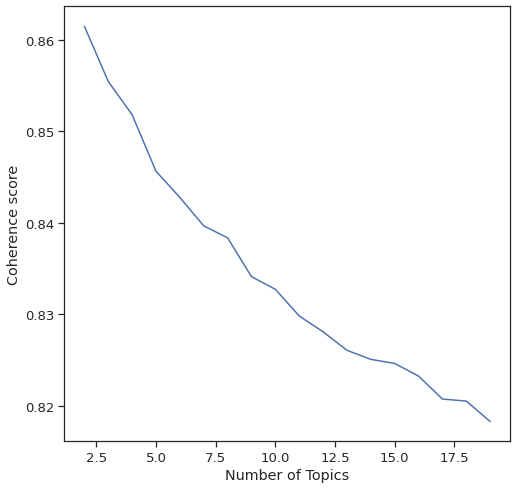

In [85]:
# Plot a graph of number of topics and coherence score 
x = range(start, limit, step)
plt.figure(figsize=(8, 8))
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
# plt.legend(("coherence_values"), loc='best')
plt.show()

We notice that the coherence score keeps decreasing steadily as the number of topics increase. Our initial choice of 15 topics was not a good one. From the graph above, a good pick for the number of topics is probably 3. So lets look at the model with just 3 topics and see what that looks like. 

In [86]:
# Get the model with index 1, which is the model with 3 topics/clusters
index, value = max(enumerate(coherence_values), key=operator.itemgetter(1))
index = 1
# this is the optimal model
optimal_model = model_list[index]
model_topics = optimal_model.show_topics(num_topics=1000, formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.031*"hole" + 0.031*"black" + 0.019*"galaxy" + 0.019*"make" + '
  '0.016*"earth" + 0.015*"relativity" + 0.014*"event" + 0.014*"number" + '
  '0.013*"travel" + 0.012*"general"'),
 (1,
  '0.061*"time" + 0.056*"universe" + 0.036*"particle" + 0.034*"light" + '
  '0.017*"wave" + 0.013*"law" + 0.013*"speed" + 0.012*"gravitational" + '
  '0.011*"state" + 0.011*"orbit"'),
 (2,
  '0.043*"theory" + 0.031*"star" + 0.026*"space" + 0.018*"energy" + '
  '0.017*"million" + 0.015*"matter" + 0.014*"call" + 0.014*"move" + '
  '0.014*"sun" + 0.013*"gravity"')]


In [87]:
#Print these topics
for topic in sorted(optimal_model.show_topics(num_topics=1000, num_words=10, formatted=False), key=lambda x: x[0]):
    print('Topic {}: {}'.format(topic[0], [item[0] for item in topic[1]]))

Topic 0: ['hole', 'black', 'galaxy', 'make', 'earth', 'relativity', 'event', 'number', 'travel', 'general']
Topic 1: ['time', 'universe', 'particle', 'light', 'wave', 'law', 'speed', 'gravitational', 'state', 'orbit']
Topic 2: ['theory', 'star', 'space', 'energy', 'million', 'matter', 'call', 'move', 'sun', 'gravity']


In [88]:
# Regenerate the model with 3 topics so that we can visualize it with pyLDAvis
better_lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, #this time we pick 3 as the topics
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10, #number of epocs
                                           alpha='auto',
                                           per_word_topics=True)

In [89]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(better_lda_model, corpus, id2word)
pyLDAvis.display(vis)

### **Clustering**
---


<img src='https://drive.google.com/uc?id=1eKFrisIuPGtH41Agm_CV4b5V-g41NAKa' height=500 width=800>  
**Cluster analysis** or **clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). **Centroid-based clustering** organizes the data into non-hierarchical clusters. k-means is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 

#### **K-Means**
K-Means clustering is an unsupervised learning algorithm. There is no labeled data for this clustering, unlike in supervised learning. K-Means performs the division of objects into clusters that share similarities and are dissimilar to the objects belonging to another cluster. 

In [90]:
#download the large english model from spaCy
!python -m spacy download en_core_web_lg

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2022-12-13 11:37:29.572495: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 13 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [91]:
text = ''.join(hawking_df)
nlp = spacy.load("en_core_web_lg")
processed_text = nlp(text)

In [92]:
from sklearn.preprocessing import normalize

def vectorize(text):
    # Get the SpaCy vector -- turning off other processing to speed things up
    return nlp(text, disable=['parser', 'tagger', 'ner']).vector

# Now we stack the vectors and normalize them
# Inputs are called "X"
X = normalize(np.stack(vectorize(t) for t in hawking_df.Sentence))
print("X (the document matrix) has shape: {}".format(X.shape))
print("That means it has {} rows and {} columns".format(X.shape[0], X.shape[1]))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):
/usr/local/lib/python3.8/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


X (the document matrix) has shape: (2272, 300)
That means it has 2272 rows and 300 columns


A matrix with 300 dimensions cannot be easy to process! So we use [Principal Component Analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) to reduce the dimensionality of the matrix to 2 dimensions

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)
print("X2 shape is {}".format(X2.shape))

X2 shape is (2272, 2)


In [94]:
#Define the number of clusters here
CLUSTERS = 15

# First we fit the model...
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=CLUSTERS, random_state=1)
k_means.fit(X)

KMeans(n_clusters=15, random_state=1)

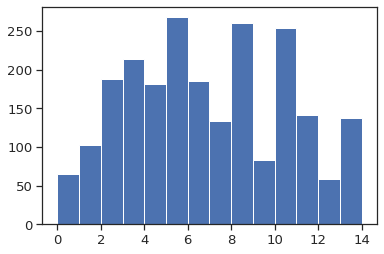

In [95]:
# Then we use it to predict clusters for each document...
# Again it's common to use yhat for a predicted value -- although we wouldn't expect these to
# correspond directly to the original groups
yhat = k_means.predict(X)

# Let's take a look at the distribution across clusters
plt.hist(yhat, bins=range(CLUSTERS))
plt.show()

That's the distribution of the words per cluster

To visualize the words in each of these clusters, we generate a wordcloud for all the words of every cluster

Wordcloud for cluster #0


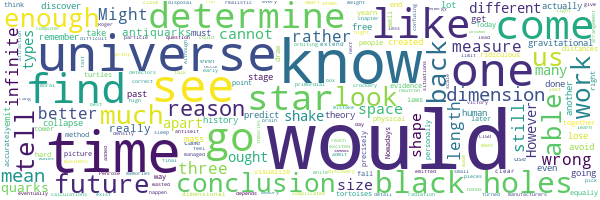

Wordcloud for cluster #1


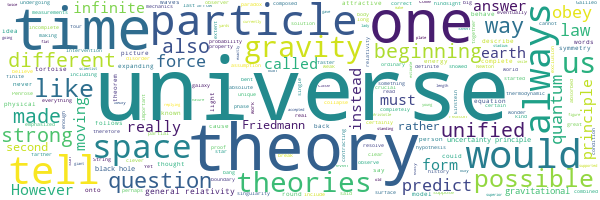

Wordcloud for cluster #2


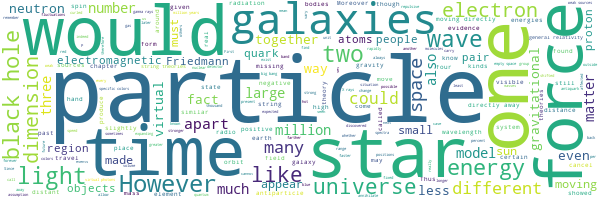

Wordcloud for cluster #3


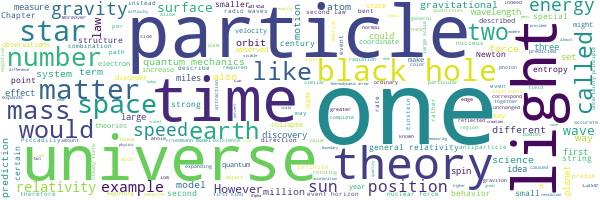

Wordcloud for cluster #4


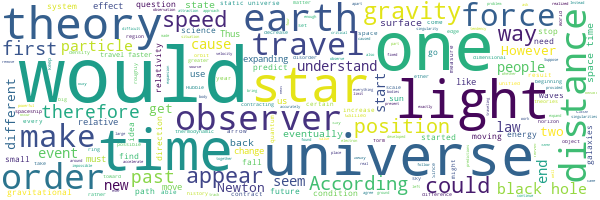

Wordcloud for cluster #5


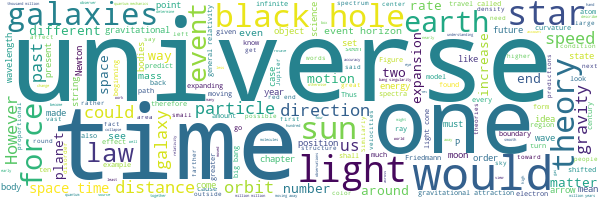

Wordcloud for cluster #6


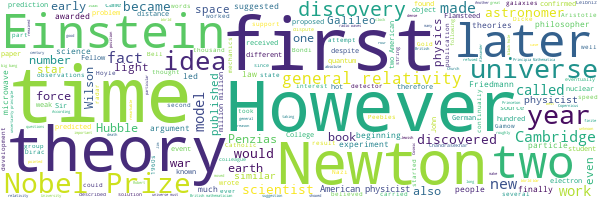

Wordcloud for cluster #7


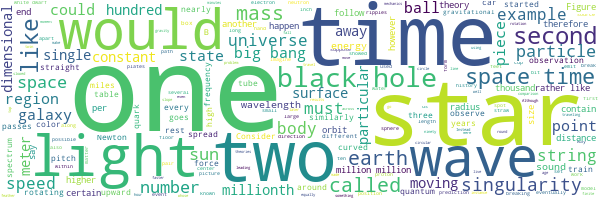

Wordcloud for cluster #8


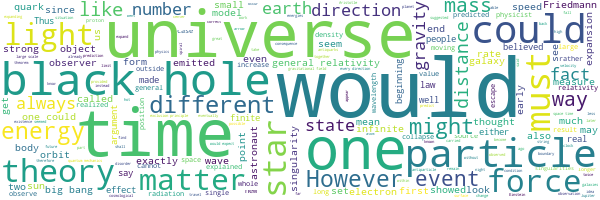

Wordcloud for cluster #9


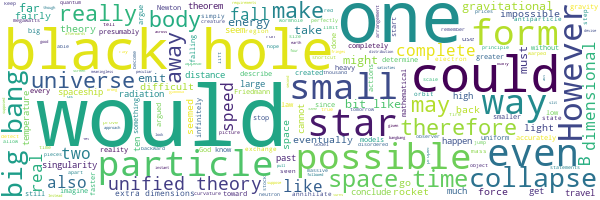

Wordcloud for cluster #10


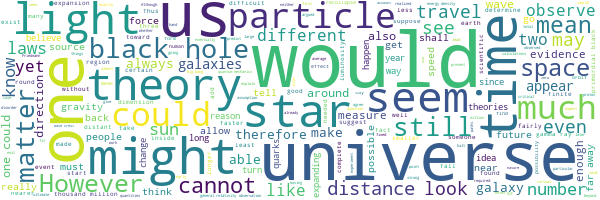

Wordcloud for cluster #11


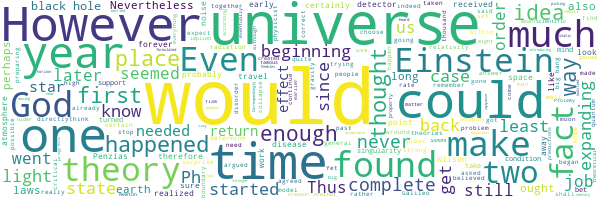

Wordcloud for cluster #12


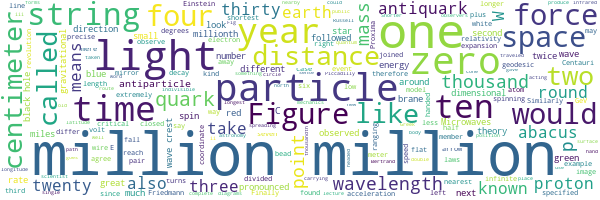

Wordcloud for cluster #13


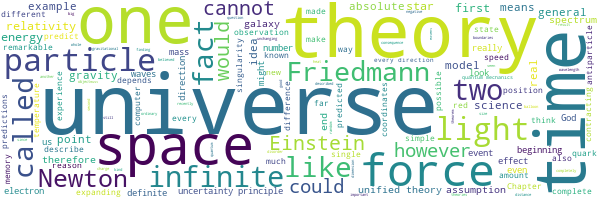

In [96]:
wc = WordCloud(background_color='white', width=600, height=200, stopwords=stop_words)

for c in range(CLUSTERS-1):
    print("Wordcloud for cluster #{}".format(c))
    display(wc.generate(" ".join(hawking_df.Sentence[yhat == c])).to_image())

### **Deep Learning and Neural nets**
---


<img src='https://drive.google.com/uc?id=14-nwgwoYEKnMo1rJHegosXFVU3p2Sb-C' height=400>

***Deep learning*** is a type of machine learning and artificial intelligence that imitates the way humans gain certain types of knowledge. Deep learning is an important element of data science, which includes statistics and predictive modeling. Deep learning is essentially a neural network with three or more layers. 


We can build simple binary classifiers on our dataframe that we've already built form prior cells. We have a field called label which essentially denotes whether a sentence is positive or negative. We can build models using [Keras](https://keras.io/) to classify sentences of Hawking's book as positive or negative.

Text(0, 0.5, 'Number of Sentences')

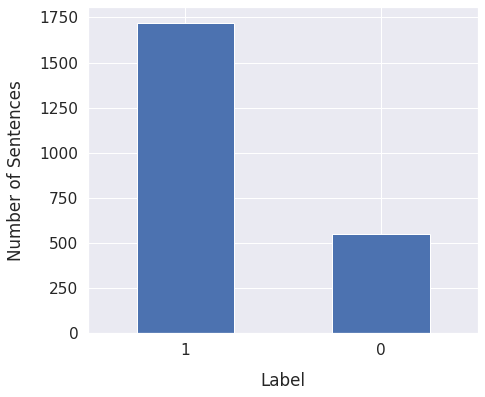

In [97]:
import seaborn as sns
sns.set(font_scale=1.4)
hawking_df['Label'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Label", labelpad=14)
plt.ylabel("Number of Sentences", labelpad=14)

In [98]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import os
# print(os.listdir("../input"))
plt.style.use('ggplot')

In [99]:
#The individual sentences are going to be the x values
sentences = hawking_df['Sentence'].values
# The labels, what we want to predict are going to be the y values. This is what the model will be tested on.
y = hawking_df['Label'].values

#do a train-test split of 75%-25%
sentence_train, sentence_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [100]:
vectorizer = CountVectorizer()
vectorizer.fit(sentence_train)

X_train = vectorizer.transform(sentence_train)
X_test  = vectorizer.transform(sentence_test)

In [101]:
X_train

<1704x3612 sparse matrix of type '<class 'numpy.int64'>'
	with 35244 stored elements in Compressed Sparse Row format>

In [102]:
#use logistic regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8116197183098591


With a simple logistic regression model, we achieved an accuracy of **81%**. Not bad

Lets also look at a bunch of other simple binary classifiers and run them on our training data, namely the following:
*   Support Vector Machine
*   Decision Tree
*   Random Forest
*   Naive Bayes
*   K-Nearest neighbours





In [103]:
models = {}

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machine'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Tree'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

The three most crucial metrics when it comes to the performance of any neural network are **Accuracy, Precision** and **Recall**.  
**Accuracy** tells you how many times the ML model was correct overall. **Precision** is how good the model is at predicting a specific category. **Recall** tells you how many times the model was able to detect a specific category.

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train.toarray(), y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test.toarray())
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [105]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Accuracy  Precision    Recall
Support Vector Machine  0.811620   0.908665  0.850877
Decision Tree           0.808099   0.882904  0.864679
Random Forest           0.845070   0.971897  0.845214
Naive Bayes             0.656690   0.709602  0.810160
K-Nearest Neighbor      0.751761   0.978923  0.760000

The random forest classifer has the best metrics for our dataset and outperforms the rest like Naive Bayes and K-Nearest neighbor by a good margin

Maybe we can improve the performance with deeper networks. We use Keras to generate deep neural nets with hidden layers below.

In [106]:
input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [107]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                36130     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 36,141
Trainable params: 36,141
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


171/171 [==============================] - 2s 4ms/step - loss: 0.5820 - acc: 0.7512 - val_loss: 0.5582 - val_acc: 0.7518
Epoch 2/20
171/171 [==============================] - 1s 4ms/step - loss: 0.4856 - acc: 0.7717 - val_loss: 0.5181 - val_acc: 0.7694
Epoch 3/20
171/171 [==============================] - 1s 6ms/step - loss: 0.3743 - acc: 0.8556 - val_loss: 0.4820 - val_acc: 0.7905
Epoch 4/20
171/171 [==============================] - 1s 5ms/step - loss: 0.2638 - acc: 0.9114 - val_loss: 0.4599 - val_acc: 0.8063
Epoch 5/20
171/171 [==============================] - 1s 6ms/step - loss: 0.1855 - acc: 0.9472 - val_loss: 0.4595 - val_acc: 0.8099
Epoch 6/20
171/171 [==============================] - 1s 6ms/step - loss: 0.1326 - acc: 0.9677 - val_loss: 0.4782 - val_acc: 0.8099
Epoch 7/20
171/171 [==============================] - 1s 6ms/step - loss: 0.0971 - acc: 0.9824 - val_loss: 0.4942 - val_acc: 0.8011
Epoch 8/20
171/171 [==============================] - 1s 7ms/step - loss: 0.0720 - acc:

In [109]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

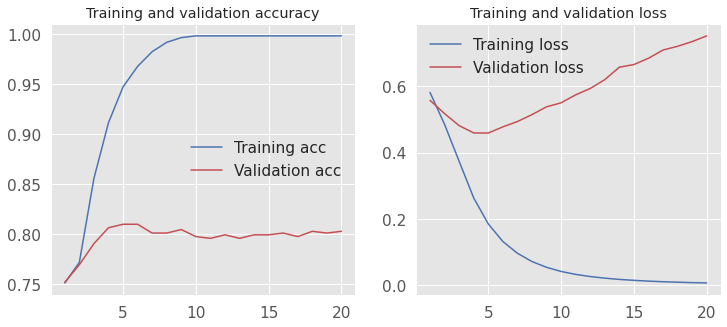

In [110]:
plot_history(history)

In [111]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentence_train)

X_train = tokenizer.texts_to_sequences(sentence_train)
X_test = tokenizer.texts_to_sequences(sentence_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentence_train[0])
print(X_train[0])

The most interesting of these is the prediction that protons, which make up much of the mass of ordinary matter, can spontaneously decay into lighter particles such as antielectrons.
[1, 141, 1638, 2, 58, 8, 1, 683, 5, 408, 34, 149, 74, 90, 2, 1, 102, 2, 559, 81, 42, 2226, 508, 80, 2227, 50, 86, 16, 1095]


In [112]:
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [113]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          374000    
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 439,429
Trainable params: 439,429
Non-trainable params: 0
________________________________________________

Training Accuracy: 1.0000
Testing Accuracy:  0.8028


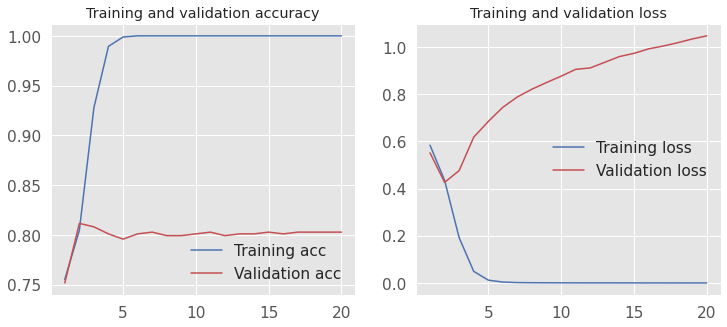

In [114]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

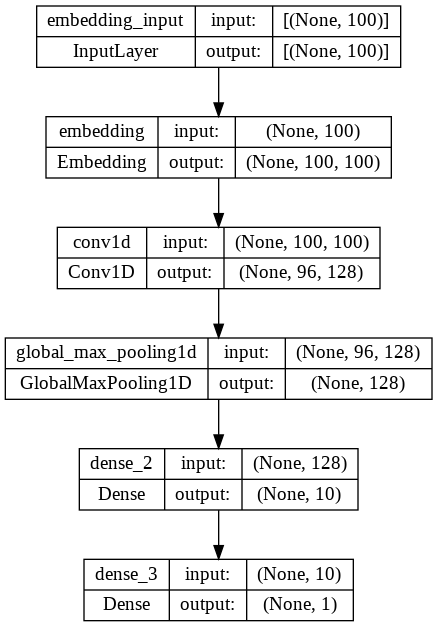

In [115]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### **Bayesian Analysis and Computational Model**
---

In [ ]:
text = '.'.join(hawking_sentences)
text = remove_stopwords(text)
text

'CHAPTER 1 OUR PICTURE OF THE UNIVERSE A well-known scientist (some Bertrand Russell) gave public lecture astronomy. He described earth orbits sun sun, turn, orbits center vast collection stars called galaxy. At end lecture, little old lady room got said: “What told rubbish. The world flat plate supported giant tortoise.” The scientist gave superior smile replying, “What tortoise standing on.” “You’re clever, young man, clever,” said old lady. “But it’s turtles way down!” Most people picture universe infinite tower tortoises ridiculous, think know better? What know universe, know it? Where universe come from, going? Did universe beginning, so, happened then? What nature time? Will come end? Can time? Recent breakthroughs physics, possible fantastic new technologies, suggest answers longstanding questions. Someday answers obvious earth orbiting sun – ridiculous tower tortoises. Only time (whatever be) tell. As long ago 340 BC Greek philosopher Aristotle, book On Heavens, able forward go

In [ ]:
sentences = nltk.sent_tokenize(text)
processed_sentences = eda(sentences)

In [ ]:
vocab = set()
for sentence in processed_sentences:
    for word in sentence.split():
        vocab.add(word)
vocab = list(vocab)

In [ ]:
prior = {word: 1/len(vocab) for word in vocab}

In [ ]:
from collections import Counter

# Flatten the list of sentences into a single list of words
words = [word for sentence in processed_sentences for word in sentence.split()]

# Count the number of occurrences of each word
word_counts = Counter(words)

# Calculate the likelihood of each word in the vocabulary
likelihood = {}
for word in vocab:
    #likelihood[word] = (prior[word] ** word_counts[word])*((1 - prior[word]) ** (len(words) - word_counts[word]))
    likelihood[word] = word_counts[word] / len(words)

In [ ]:
def calculate_posterior(data, vocab, prior, likelihood):
    # Initialize the posterior probabilities for each word in the vocabulary
    posterior = {}
    
    # Loop over each document in the dataset
    for doc in data:
        # Convert the document into a list of words
        words = doc.split()
        
        # Initialize the posterior probabilities for each word in the document
        doc_posterior = {}
        
        # Loop over each word in the document
        for word in words:
            # Check if the word is in the vocabulary
            if word in vocab:
                # Initialize the posterior probability for the word
                word_posterior = 0
                
                # Loop over each class in the prior probabilities
                for cls in prior.keys():
                    # Calculate the likelihood of the word given the class
                    p = (prior[cls]) * (likelihood[cls])
                    
                    # Update the posterior probability for the word
                    word_posterior += p
                
                # Store the posterior probability for the word
                doc_posterior[word] = word_posterior
        
        # Update the posterior probabilities for each word in the vocabulary
        for word in doc_posterior.keys():
            if word not in posterior:
                posterior[word] = doc_posterior[word]
            else:
                posterior[word] += doc_posterior[word]
    
    # Return the posterior probabilities for each word in the vocabulary
    return posterior

# posterior = {}
# for word in vocab:
#     p = prior[word]*likelihood[word]
#     posterior[word] = p / (p + (1 - prior[word]) ** (len(words) - word_counts[word]))

In [ ]:
posterior = calculate_posterior(sentences, vocab, prior, likelihood)

In [ ]:
frequent_words_dict = {k: v for k, v in sorted(posterior.items(), key=lambda item: item[1], reverse=True) if v > 0.01}


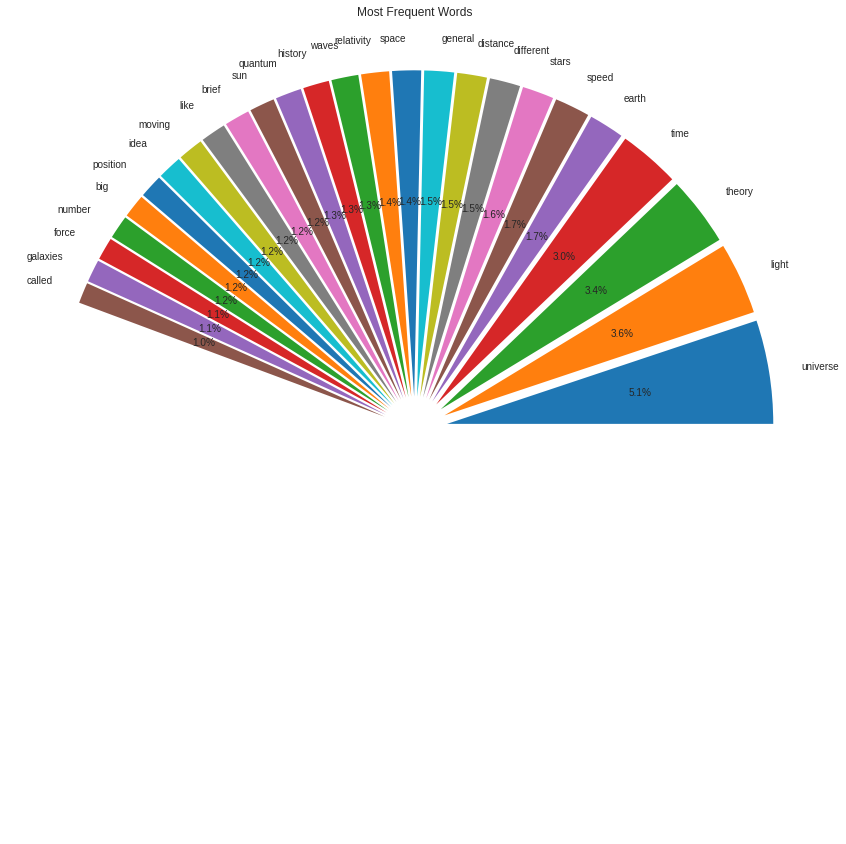

In [ ]:
import matplotlib.pyplot as plt
labels = frequent_words_dict.keys()

# Set the values to the posterior probabilities for each word in the vocabulary
values = [frequent_words_dict[word] for word in frequent_words_dict.keys()]

plt.figure(figsize=(15, 15))

# Create the pie chart
plt.pie(values, labels=labels, explode=[0.1] * len(values), startangle=360, autopct='%1.1f%%')

plt.title("Most Frequent Words")

# Show the plot
plt.show()

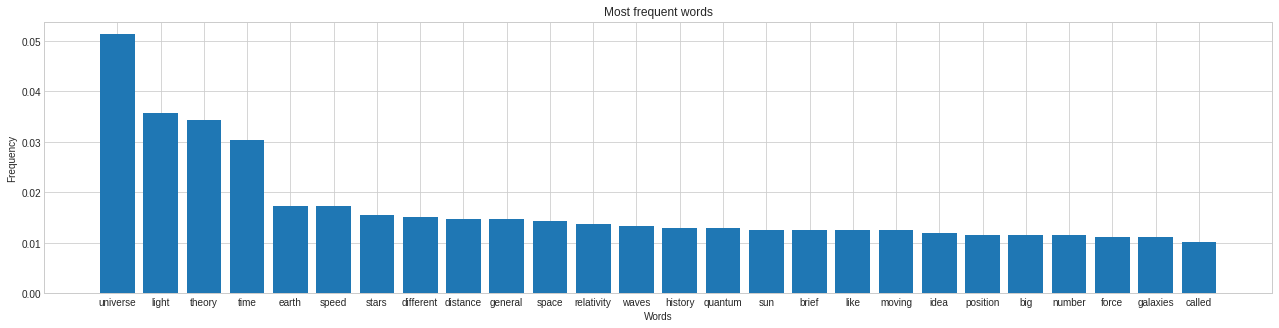

In [ ]:
import matplotlib.pyplot as plt

# Select the words with frquency more than 1%
words = [word for word, count in frequent_words_dict.items()]
counts = [count for word, count in frequent_words_dict.items()]

plt.figure(figsize=(22, 5))

# Use the hist() function to create a histogram of the data
# plt.hist(data, bins=50)


# Use the bar() function to create a bar chart
plt.bar(words, counts)

# Add labels to the x-axis and y-axis
plt.xlabel('Words')
plt.ylabel('Frequency')

# Add a title to the bar chart
plt.title('Most frequent words')

# Show the plot
plt.show()


In [ ]:
!pip install pymc3


In [149]:
nouns_list = list()
for sentence in hawking_df.Sentence:
  nouns = 0
  processed_text = nlp(sentence)
  for ent in processed_text:
        if ent.pos_ == 'NOUN':
            nouns +=1
  nouns_list.append(nouns)

In [150]:
verbs_list = list()
for sentence in hawking_df.Sentence:
  verbs = 0
  processed_text = nlp(sentence)
  for ent in processed_text:
        if ent.pos_ == 'VERB':
            verbs +=1
  verbs_list.append(verbs)

In [154]:
glm_df = pd.DataFrame()
glm_df['NumWords'] = hawking_df.NumWords
glm_df['Nouns'] = nouns_list
glm_df['Verbs'] = verbs_list
glm_df

NumWords  Nouns  Verbs
0           16      3      3
1           28      8      4
2           27      5      3
3           40      9      6
4           32      7      4
...        ...    ...    ...
2267        24      3      4
2268        17      3      1
2269        35      5      6
2270        27      2      1
2271        32      9      3

[2272 rows x 3 columns]

In [163]:
glm_df.to_csv('glm_data.csv')

### **Ranking models**
---

<img src='https://drive.google.com/uc?id=1ufaRzFbDj0Y7iXgKxOnvlgBU94DDaMog' width=800 height=400>

A graph-based ranking algorithm for text processing is a way of deciding on the importance of a vertex within a graph, which can be used in order to find the most relevant sentences in text and also to find keywords.  
In this section, we test out two such algorithms, **TextRank** and **HITS (Hyperlinked Induced Topic Search)**.


#### **TextRank**

In [ ]:
!pip install sentence_transformers

In [117]:
from sentence_transformers import SentenceTransformer

In [118]:
bmodel = SentenceTransformer('all-MiniLM-L6-v2')

In [119]:
#generate BERT embeddings for the sentences in our corpus
bert_embeddings = bmodel.encode(hawking_df.Sentence)
bert_embeddings.shape

(2272, 384)

In [ ]:
#Print the BERT embeddings
for i, (sentence, embedding) in enumerate(zip(hawking_df.Sentence, bert_embeddings)):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    if i == 3: break

In [121]:
bert_embeddings.shape

(2272, 384)

In [122]:
from tqdm import tqdm
#M = np.zeros((1933, 1933))
M = np.eye(2272)

for i,a in tqdm(enumerate(bert_embeddings)):
    for j,b in enumerate(bert_embeddings):
        if i != j:
            M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))

2272it [01:29, 25.32it/s]


In [123]:
import networkx

similarity_graph = networkx.from_numpy_array(M)
similarity_graph

In [124]:
#!pip install scipy==1.8.0

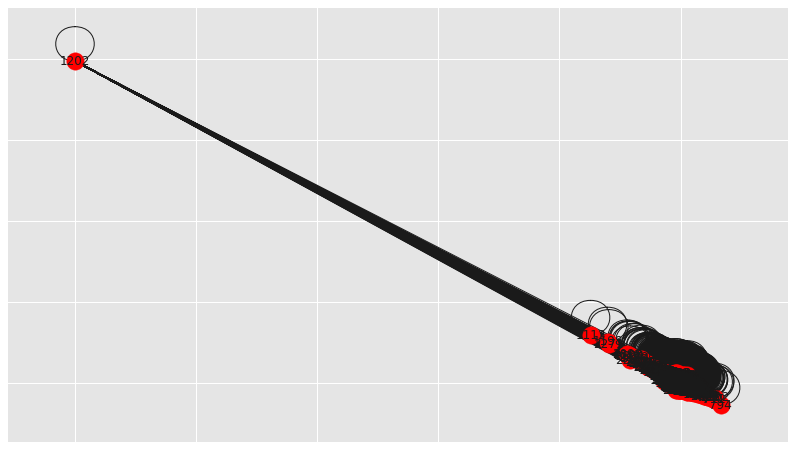

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='red')

In [126]:
scores = networkx.pagerank_numpy(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
nx_ranked_sentences[:10]

<ipython-input-126-cd439b2899ad>:1: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  scores = networkx.pagerank_numpy(similarity_graph)
/usr/local/lib/python3.8/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


[(0.000743853131806842, 427),
 (0.0007343330976408881, 1018),
 (0.0007131168042459403, 430),
 (0.0007071972741151445, 45),
 (0.000705213270964413, 149),
 (0.0007009437923068037, 367),
 (0.0006975962335342712, 1725),
 (0.0006941829281231155, 2188),
 (0.0006936791194693135, 2189),
 (0.00069181846150281, 113)]

The 10 highest ranked sentences in the book are:

In [127]:
for i in range(10):
    print(hawking_df.Sentence[nx_ranked_sentences[i][1]])
    print('----------')

This was true even of the special theory of relativity.
----------
And even then it was a long time before the implications of the theory for massive stars were understood.
----------
The situation, however, is quite different in the general theory of relativity.
----------
However, Copernicus’s theory was much simpler.)
----------
(If we know what the universe is like at any one time, these physical laws tell us how it will look at any later time.)
----------
The theory also tells us that nothing can travel faster than light.
----------
One has to use a quantum theory of gravity to understand how the universe began.
----------
It seems that this idea could explain many of the observed features of the universe, such as its large-scale uniformity and also the smaller-scale departures from homogeneity, like galaxies, stars, and even human beings.
----------
It could even account for the arrow of time that we observe.
----------
This discovery finally brought the question of the beginning

#### **HITS (Hyperlinked Induced Topic Search)**

In [128]:
scores = networkx.hits(similarity_graph)
nx_hits_ranked_sentences = sorted(((value, key) for key, value 
                                            in scores[0].items()), reverse=True)
nx_hits_ranked_sentences[:10]

/usr/local/lib/python3.8/dist-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)
/usr/local/lib/python3.8/dist-packages/networkx/linalg/graphmatrix.py:173: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `to_scipy_sparse_array` instead.
  return nx.to_scipy_sparse_matrix(G, nodelist=nodelist, dtype=dtype, weight=weight)


[(0.0008191249476531456, 1018),
 (0.0007986716850253677, 427),
 (0.0007670239368768869, 2188),
 (0.0007641607920026909, 1725),
 (0.0007610484416770755, 430),
 (0.0007608838320165088, 156),
 (0.000756634011677478, 45),
 (0.0007557579444268654, 149),
 (0.0007557116824340885, 2201),
 (0.0007555736021783367, 367)]

The 10 highest ranked sentences in the book according to HITs are:

In [129]:
for i in range(10):
    print(hawking_df.Sentence[nx_hits_ranked_sentences[i][1]])
    print('----------')

And even then it was a long time before the implications of the theory for massive stars were understood.
----------
This was true even of the special theory of relativity.
----------
It seems that this idea could explain many of the observed features of the universe, such as its large-scale uniformity and also the smaller-scale departures from homogeneity, like galaxies, stars, and even human beings.
----------
One has to use a quantum theory of gravity to understand how the universe began.
----------
The situation, however, is quite different in the general theory of relativity.
----------
It turns out to be very difficult to devise a theory to describe the universe all in one go.
----------
However, Copernicus’s theory was much simpler.)
----------
(If we know what the universe is like at any one time, these physical laws tell us how it will look at any later time.)
----------
Up to now, most scientists have been too occupied with the development of new theories that describe what t